# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

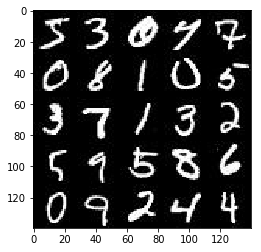

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

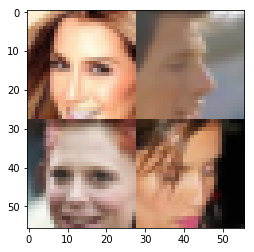

In [3]:
show_n_images = 5

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/reddyv/miniconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image_placeholder = tf.placeholder(tf.float32,shape=(None,image_width,
                    image_height,image_channels))
    

    return image_placeholder, tf.placeholder(tf.float32,shape=(None,z_dim)), tf.placeholder(tf.float32)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
       
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
    
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('generator', reuse=not is_train):
        
        fc1 = tf.layers.dense(z, 7*7*256)
        
        x1 = tf.reshape(fc1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.nn.relu(x1)

        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.relu(x2)

        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='SAME')
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    _,d_logits_real = discriminator(input_real, reuse=False)
    d_loss_real = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                          labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    _,d_logits_fake = discriminator(g_model, reuse=True)
    d_loss_fake = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                          labels=tf.zeros_like(d_logits_real)))
    
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
             tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                     labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Optimizers

    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)

    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)
   
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    print_every = 10
    show_every = 100
    steps = 0
    
    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    # Loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    # Optimizers
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images*2 
                
                #Random Noise to feed into G
                batch_z = np.random.uniform(-1, 1, size=(batch_size,z_dim))

                #Run Optimizers
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z:batch_z})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 10, input_z, data_shape[3], data_image_mode)

                steps +=1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 7.4468... Generator Loss: 0.0037


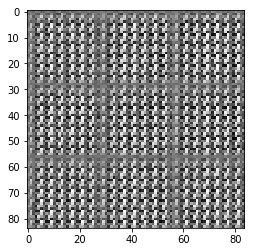

Epoch 1/2... Discriminator Loss: 4.6962... Generator Loss: 10.2438
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 1.9863
Epoch 1/2... Discriminator Loss: 1.8314... Generator Loss: 1.8752
Epoch 1/2... Discriminator Loss: 1.8023... Generator Loss: 1.6848
Epoch 1/2... Discriminator Loss: 1.6540... Generator Loss: 1.4577
Epoch 1/2... Discriminator Loss: 1.6342... Generator Loss: 1.4068
Epoch 1/2... Discriminator Loss: 1.4009... Generator Loss: 1.3216
Epoch 1/2... Discriminator Loss: 1.5074... Generator Loss: 1.5511
Epoch 1/2... Discriminator Loss: 1.4927... Generator Loss: 1.3808
Epoch 1/2... Discriminator Loss: 1.3977... Generator Loss: 1.5807


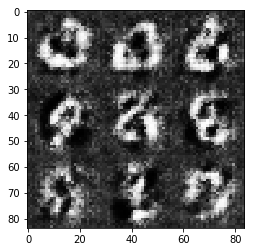

Epoch 1/2... Discriminator Loss: 1.3216... Generator Loss: 1.6373
Epoch 1/2... Discriminator Loss: 1.2733... Generator Loss: 1.2272
Epoch 1/2... Discriminator Loss: 1.3463... Generator Loss: 1.2095
Epoch 1/2... Discriminator Loss: 1.4030... Generator Loss: 1.6992
Epoch 1/2... Discriminator Loss: 1.5028... Generator Loss: 1.6174
Epoch 1/2... Discriminator Loss: 1.3160... Generator Loss: 1.1508
Epoch 1/2... Discriminator Loss: 1.5133... Generator Loss: 1.9688
Epoch 1/2... Discriminator Loss: 1.6227... Generator Loss: 1.9356
Epoch 1/2... Discriminator Loss: 1.6547... Generator Loss: 2.0081
Epoch 1/2... Discriminator Loss: 1.3609... Generator Loss: 1.5621


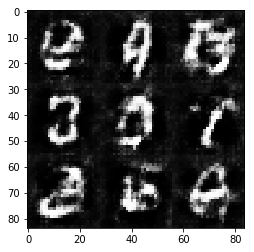

Epoch 1/2... Discriminator Loss: 1.1759... Generator Loss: 1.7403
Epoch 1/2... Discriminator Loss: 1.4306... Generator Loss: 1.4617
Epoch 1/2... Discriminator Loss: 1.4247... Generator Loss: 1.9089
Epoch 1/2... Discriminator Loss: 1.4030... Generator Loss: 1.6332
Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 1.4447
Epoch 1/2... Discriminator Loss: 1.5918... Generator Loss: 2.0451
Epoch 1/2... Discriminator Loss: 1.1643... Generator Loss: 1.1554
Epoch 1/2... Discriminator Loss: 1.2861... Generator Loss: 1.7302
Epoch 1/2... Discriminator Loss: 1.2447... Generator Loss: 1.2991
Epoch 1/2... Discriminator Loss: 1.1686... Generator Loss: 1.3774


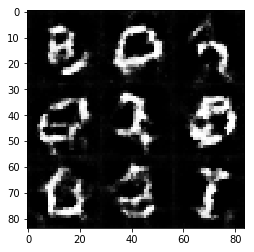

Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 1.4336
Epoch 1/2... Discriminator Loss: 1.0764... Generator Loss: 1.3149
Epoch 1/2... Discriminator Loss: 1.1457... Generator Loss: 1.2701
Epoch 1/2... Discriminator Loss: 1.2241... Generator Loss: 1.5563
Epoch 1/2... Discriminator Loss: 1.4623... Generator Loss: 2.1088
Epoch 1/2... Discriminator Loss: 1.2173... Generator Loss: 1.6969
Epoch 1/2... Discriminator Loss: 1.0299... Generator Loss: 1.5147
Epoch 1/2... Discriminator Loss: 1.0268... Generator Loss: 1.8490
Epoch 1/2... Discriminator Loss: 1.2902... Generator Loss: 1.7529
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 1.3228


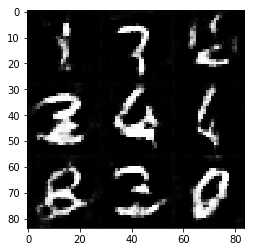

Epoch 1/2... Discriminator Loss: 1.2053... Generator Loss: 1.7752
Epoch 1/2... Discriminator Loss: 1.1112... Generator Loss: 1.4872
Epoch 1/2... Discriminator Loss: 1.5643... Generator Loss: 1.8813
Epoch 1/2... Discriminator Loss: 1.2077... Generator Loss: 1.1345
Epoch 1/2... Discriminator Loss: 1.0775... Generator Loss: 1.3401
Epoch 1/2... Discriminator Loss: 1.2944... Generator Loss: 1.9605
Epoch 1/2... Discriminator Loss: 1.2667... Generator Loss: 1.0429
Epoch 1/2... Discriminator Loss: 1.6044... Generator Loss: 2.1867
Epoch 1/2... Discriminator Loss: 1.0296... Generator Loss: 1.3372
Epoch 1/2... Discriminator Loss: 1.3989... Generator Loss: 1.9938


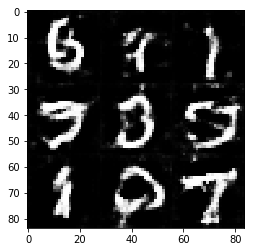

Epoch 1/2... Discriminator Loss: 1.1043... Generator Loss: 1.4255
Epoch 1/2... Discriminator Loss: 1.0721... Generator Loss: 1.7694
Epoch 1/2... Discriminator Loss: 1.0831... Generator Loss: 1.8074
Epoch 1/2... Discriminator Loss: 1.1340... Generator Loss: 0.7341
Epoch 1/2... Discriminator Loss: 1.5723... Generator Loss: 0.4154
Epoch 1/2... Discriminator Loss: 1.3354... Generator Loss: 0.5237
Epoch 1/2... Discriminator Loss: 2.3655... Generator Loss: 3.2093
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 1.4230
Epoch 1/2... Discriminator Loss: 1.1362... Generator Loss: 1.4397
Epoch 1/2... Discriminator Loss: 1.5411... Generator Loss: 0.4861


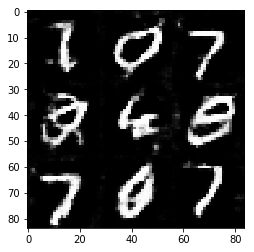

Epoch 1/2... Discriminator Loss: 1.5329... Generator Loss: 0.4538
Epoch 1/2... Discriminator Loss: 1.8705... Generator Loss: 0.2908
Epoch 1/2... Discriminator Loss: 0.8777... Generator Loss: 1.9049
Epoch 1/2... Discriminator Loss: 1.7844... Generator Loss: 2.3758
Epoch 1/2... Discriminator Loss: 1.0935... Generator Loss: 1.2222
Epoch 1/2... Discriminator Loss: 1.1497... Generator Loss: 0.7265
Epoch 1/2... Discriminator Loss: 1.4065... Generator Loss: 1.9843
Epoch 1/2... Discriminator Loss: 1.0595... Generator Loss: 1.9682
Epoch 1/2... Discriminator Loss: 1.0012... Generator Loss: 1.5021
Epoch 1/2... Discriminator Loss: 1.0266... Generator Loss: 1.5544


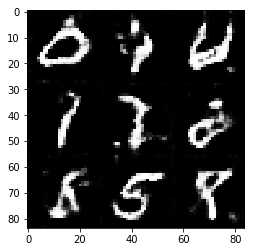

Epoch 1/2... Discriminator Loss: 1.1383... Generator Loss: 1.6425
Epoch 1/2... Discriminator Loss: 1.0951... Generator Loss: 1.7303
Epoch 1/2... Discriminator Loss: 0.8766... Generator Loss: 1.3875
Epoch 1/2... Discriminator Loss: 0.9734... Generator Loss: 2.0663
Epoch 1/2... Discriminator Loss: 0.9619... Generator Loss: 1.3437
Epoch 1/2... Discriminator Loss: 0.8060... Generator Loss: 1.8206
Epoch 1/2... Discriminator Loss: 1.7861... Generator Loss: 2.3237
Epoch 1/2... Discriminator Loss: 1.4535... Generator Loss: 2.1832
Epoch 1/2... Discriminator Loss: 1.0497... Generator Loss: 1.5412
Epoch 1/2... Discriminator Loss: 0.9977... Generator Loss: 1.8157


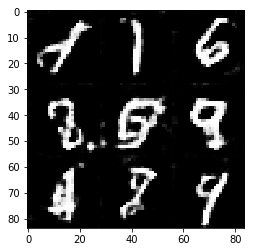

Epoch 1/2... Discriminator Loss: 0.7922... Generator Loss: 1.5810
Epoch 1/2... Discriminator Loss: 1.0919... Generator Loss: 1.3084
Epoch 1/2... Discriminator Loss: 0.9377... Generator Loss: 1.7088
Epoch 1/2... Discriminator Loss: 2.1133... Generator Loss: 0.2553
Epoch 1/2... Discriminator Loss: 1.1008... Generator Loss: 0.8112
Epoch 1/2... Discriminator Loss: 1.4743... Generator Loss: 3.2817
Epoch 1/2... Discriminator Loss: 1.3974... Generator Loss: 0.5137
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 0.6847
Epoch 1/2... Discriminator Loss: 1.8519... Generator Loss: 0.3495
Epoch 1/2... Discriminator Loss: 1.3286... Generator Loss: 0.5739


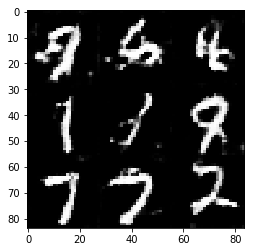

Epoch 1/2... Discriminator Loss: 1.5556... Generator Loss: 0.4320
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.5787
Epoch 1/2... Discriminator Loss: 1.3293... Generator Loss: 0.6242
Epoch 2/2... Discriminator Loss: 1.6398... Generator Loss: 2.5035
Epoch 2/2... Discriminator Loss: 1.3854... Generator Loss: 0.5133
Epoch 2/2... Discriminator Loss: 1.6769... Generator Loss: 0.3712
Epoch 2/2... Discriminator Loss: 1.9460... Generator Loss: 0.2766
Epoch 2/2... Discriminator Loss: 1.3565... Generator Loss: 0.5761
Epoch 2/2... Discriminator Loss: 1.0140... Generator Loss: 1.2854
Epoch 2/2... Discriminator Loss: 1.3726... Generator Loss: 1.7476


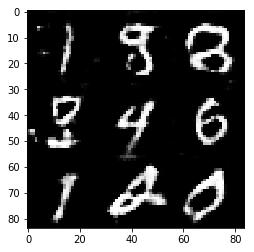

Epoch 2/2... Discriminator Loss: 1.7642... Generator Loss: 2.4804
Epoch 2/2... Discriminator Loss: 1.1189... Generator Loss: 0.8237
Epoch 2/2... Discriminator Loss: 1.4306... Generator Loss: 0.5378
Epoch 2/2... Discriminator Loss: 1.6582... Generator Loss: 0.3744
Epoch 2/2... Discriminator Loss: 1.0531... Generator Loss: 0.8217
Epoch 2/2... Discriminator Loss: 1.4337... Generator Loss: 0.5004
Epoch 2/2... Discriminator Loss: 1.0514... Generator Loss: 0.8229
Epoch 2/2... Discriminator Loss: 1.0675... Generator Loss: 1.3158
Epoch 2/2... Discriminator Loss: 0.8417... Generator Loss: 1.1696
Epoch 2/2... Discriminator Loss: 1.9807... Generator Loss: 2.5479


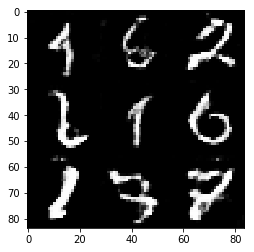

Epoch 2/2... Discriminator Loss: 0.7998... Generator Loss: 1.4545
Epoch 2/2... Discriminator Loss: 0.9009... Generator Loss: 1.3479
Epoch 2/2... Discriminator Loss: 0.7464... Generator Loss: 1.7071
Epoch 2/2... Discriminator Loss: 0.8203... Generator Loss: 1.3003
Epoch 2/2... Discriminator Loss: 1.1461... Generator Loss: 2.4392
Epoch 2/2... Discriminator Loss: 1.5979... Generator Loss: 2.9013
Epoch 2/2... Discriminator Loss: 1.1641... Generator Loss: 0.8672
Epoch 2/2... Discriminator Loss: 2.0811... Generator Loss: 3.3983
Epoch 2/2... Discriminator Loss: 0.8177... Generator Loss: 1.3437
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.8268


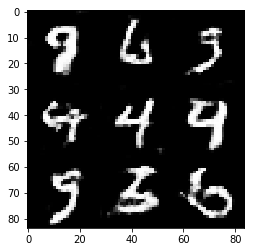

Epoch 2/2... Discriminator Loss: 0.9577... Generator Loss: 2.1048
Epoch 2/2... Discriminator Loss: 0.8724... Generator Loss: 1.2429
Epoch 2/2... Discriminator Loss: 1.5319... Generator Loss: 2.4385
Epoch 2/2... Discriminator Loss: 1.1261... Generator Loss: 1.7308
Epoch 2/2... Discriminator Loss: 0.7509... Generator Loss: 1.6533
Epoch 2/2... Discriminator Loss: 1.7128... Generator Loss: 0.3999
Epoch 2/2... Discriminator Loss: 0.8644... Generator Loss: 1.1336
Epoch 2/2... Discriminator Loss: 0.8968... Generator Loss: 1.1602
Epoch 2/2... Discriminator Loss: 1.1929... Generator Loss: 2.4070
Epoch 2/2... Discriminator Loss: 0.9393... Generator Loss: 1.8930


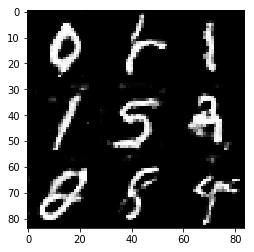

Epoch 2/2... Discriminator Loss: 1.8071... Generator Loss: 0.3790
Epoch 2/2... Discriminator Loss: 1.2218... Generator Loss: 0.6880
Epoch 2/2... Discriminator Loss: 1.5098... Generator Loss: 0.5070
Epoch 2/2... Discriminator Loss: 1.1373... Generator Loss: 0.7322
Epoch 2/2... Discriminator Loss: 1.1511... Generator Loss: 2.3848
Epoch 2/2... Discriminator Loss: 1.0017... Generator Loss: 1.6402
Epoch 2/2... Discriminator Loss: 0.7026... Generator Loss: 1.9833
Epoch 2/2... Discriminator Loss: 0.9169... Generator Loss: 2.0171
Epoch 2/2... Discriminator Loss: 1.1098... Generator Loss: 0.8356
Epoch 2/2... Discriminator Loss: 2.1355... Generator Loss: 0.2635


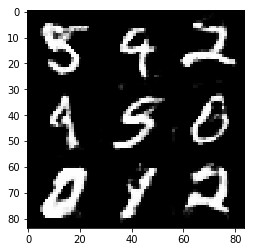

Epoch 2/2... Discriminator Loss: 1.3565... Generator Loss: 0.6231
Epoch 2/2... Discriminator Loss: 1.9905... Generator Loss: 0.3061
Epoch 2/2... Discriminator Loss: 0.8310... Generator Loss: 1.8554
Epoch 2/2... Discriminator Loss: 0.7044... Generator Loss: 1.6187
Epoch 2/2... Discriminator Loss: 0.8895... Generator Loss: 1.6811
Epoch 2/2... Discriminator Loss: 0.9719... Generator Loss: 1.9684
Epoch 2/2... Discriminator Loss: 0.8020... Generator Loss: 1.8041
Epoch 2/2... Discriminator Loss: 0.7516... Generator Loss: 1.8838
Epoch 2/2... Discriminator Loss: 0.8936... Generator Loss: 1.1710
Epoch 2/2... Discriminator Loss: 1.8681... Generator Loss: 0.3528


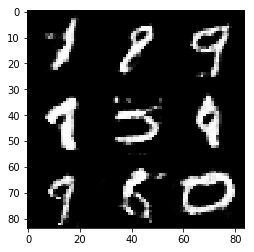

Epoch 2/2... Discriminator Loss: 1.4363... Generator Loss: 0.5294
Epoch 2/2... Discriminator Loss: 1.5345... Generator Loss: 0.4486
Epoch 2/2... Discriminator Loss: 1.6908... Generator Loss: 0.4040
Epoch 2/2... Discriminator Loss: 1.4274... Generator Loss: 0.5465
Epoch 2/2... Discriminator Loss: 1.0082... Generator Loss: 0.9608
Epoch 2/2... Discriminator Loss: 0.8409... Generator Loss: 1.6205
Epoch 2/2... Discriminator Loss: 0.6358... Generator Loss: 1.8342
Epoch 2/2... Discriminator Loss: 0.8651... Generator Loss: 1.5891
Epoch 2/2... Discriminator Loss: 2.0201... Generator Loss: 3.1928
Epoch 2/2... Discriminator Loss: 0.9104... Generator Loss: 1.2793


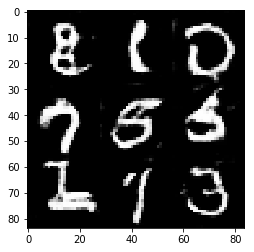

Epoch 2/2... Discriminator Loss: 1.7164... Generator Loss: 0.3836
Epoch 2/2... Discriminator Loss: 0.9431... Generator Loss: 0.9685
Epoch 2/2... Discriminator Loss: 1.2978... Generator Loss: 0.7517
Epoch 2/2... Discriminator Loss: 1.7940... Generator Loss: 0.3479
Epoch 2/2... Discriminator Loss: 0.9741... Generator Loss: 0.9835
Epoch 2/2... Discriminator Loss: 0.9591... Generator Loss: 1.0047
Epoch 2/2... Discriminator Loss: 1.4595... Generator Loss: 2.5063
Epoch 2/2... Discriminator Loss: 1.6333... Generator Loss: 0.4523
Epoch 2/2... Discriminator Loss: 0.6861... Generator Loss: 1.5789
Epoch 2/2... Discriminator Loss: 0.8562... Generator Loss: 1.2642


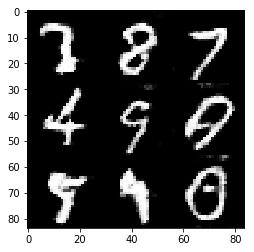

Epoch 2/2... Discriminator Loss: 1.7067... Generator Loss: 2.9727
Epoch 2/2... Discriminator Loss: 0.9280... Generator Loss: 1.6247
Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.9041
Epoch 2/2... Discriminator Loss: 1.6566... Generator Loss: 0.4854
Epoch 2/2... Discriminator Loss: 0.9635... Generator Loss: 0.9874
Epoch 2/2... Discriminator Loss: 1.9756... Generator Loss: 3.7247
Epoch 2/2... Discriminator Loss: 1.0581... Generator Loss: 1.1691
Epoch 2/2... Discriminator Loss: 0.8609... Generator Loss: 1.5115
Epoch 2/2... Discriminator Loss: 0.8615... Generator Loss: 1.2275
Epoch 2/2... Discriminator Loss: 1.5517... Generator Loss: 0.4534


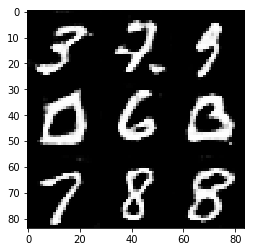

Epoch 2/2... Discriminator Loss: 1.0447... Generator Loss: 1.0528
Epoch 2/2... Discriminator Loss: 2.5352... Generator Loss: 0.1818
Epoch 2/2... Discriminator Loss: 0.8532... Generator Loss: 1.1407
Epoch 2/2... Discriminator Loss: 0.8381... Generator Loss: 2.0941
Epoch 2/2... Discriminator Loss: 1.0065... Generator Loss: 2.0349
Epoch 2/2... Discriminator Loss: 1.3591... Generator Loss: 0.6929
Epoch 2/2... Discriminator Loss: 0.8496... Generator Loss: 1.7639


NameError: name 'saver' is not defined

In [64]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 9.2888... Generator Loss: 0.0008


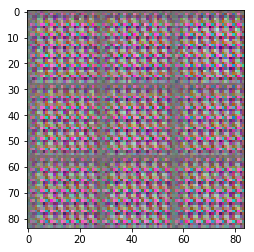

Epoch 1/1... Discriminator Loss: 0.6469... Generator Loss: 14.4105
Epoch 1/1... Discriminator Loss: 0.7925... Generator Loss: 1.2499
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.8536
Epoch 1/1... Discriminator Loss: 1.2286... Generator Loss: 3.3889
Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 0.4932
Epoch 1/1... Discriminator Loss: 0.9803... Generator Loss: 1.0612
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 1.2847
Epoch 1/1... Discriminator Loss: 2.9417... Generator Loss: 3.7534
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 0.8463


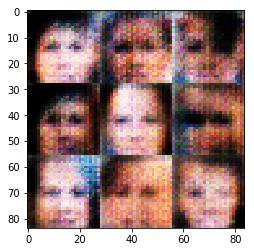

Epoch 1/1... Discriminator Loss: 1.8513... Generator Loss: 0.3335
Epoch 1/1... Discriminator Loss: 1.1758... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 1.5412... Generator Loss: 1.2421
Epoch 1/1... Discriminator Loss: 1.1669... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 0.9418... Generator Loss: 0.9081
Epoch 1/1... Discriminator Loss: 0.4822... Generator Loss: 2.5308
Epoch 1/1... Discriminator Loss: 1.8453... Generator Loss: 2.5899
Epoch 1/1... Discriminator Loss: 1.6364... Generator Loss: 0.4202
Epoch 1/1... Discriminator Loss: 1.2233... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 0.8597... Generator Loss: 1.2906


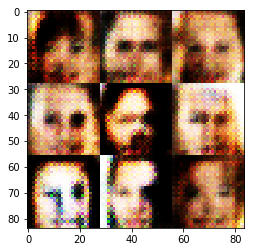

Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.7115
Epoch 1/1... Discriminator Loss: 0.8179... Generator Loss: 3.1536
Epoch 1/1... Discriminator Loss: 0.5880... Generator Loss: 1.7156
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.1921
Epoch 1/1... Discriminator Loss: 1.9505... Generator Loss: 3.2975
Epoch 1/1... Discriminator Loss: 1.4569... Generator Loss: 1.3284
Epoch 1/1... Discriminator Loss: 0.7282... Generator Loss: 1.4969
Epoch 1/1... Discriminator Loss: 1.0399... Generator Loss: 1.1471
Epoch 1/1... Discriminator Loss: 0.8173... Generator Loss: 2.4237


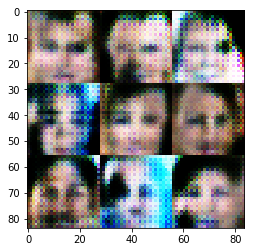

Epoch 1/1... Discriminator Loss: 0.5551... Generator Loss: 1.8147
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 1.9343
Epoch 1/1... Discriminator Loss: 1.0904... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 0.7084... Generator Loss: 1.2721
Epoch 1/1... Discriminator Loss: 1.6020... Generator Loss: 2.7031
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 0.7511
Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.4178... Generator Loss: 0.4926
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.4719
Epoch 1/1... Discriminator Loss: 0.6927... Generator Loss: 1.4277


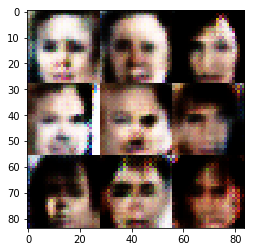

Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.8496
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.4618
Epoch 1/1... Discriminator Loss: 0.9919... Generator Loss: 1.3177
Epoch 1/1... Discriminator Loss: 1.0629... Generator Loss: 0.9145
Epoch 1/1... Discriminator Loss: 1.1151... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.3770... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.6979
Epoch 1/1... Discriminator Loss: 1.1743... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 0.5758... Generator Loss: 2.5704
Epoch 1/1... Discriminator Loss: 1.1819... Generator Loss: 0.8015


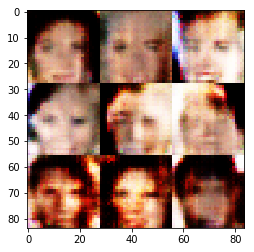

Epoch 1/1... Discriminator Loss: 0.9483... Generator Loss: 0.8359
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 2.1243... Generator Loss: 1.4439
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.5705
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.6071
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.5570
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.9339
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 1.3020
Epoch 1/1... Discriminator Loss: 1.2155... Generator Loss: 1.4772


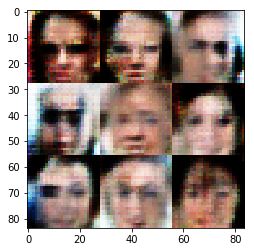

Epoch 1/1... Discriminator Loss: 1.0539... Generator Loss: 1.5650
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 1.8131
Epoch 1/1... Discriminator Loss: 0.9132... Generator Loss: 1.1443
Epoch 1/1... Discriminator Loss: 0.7490... Generator Loss: 1.1727
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 0.9347
Epoch 1/1... Discriminator Loss: 1.5696... Generator Loss: 0.4134
Epoch 1/1... Discriminator Loss: 1.6241... Generator Loss: 0.3491
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 1.0757... Generator Loss: 1.2881


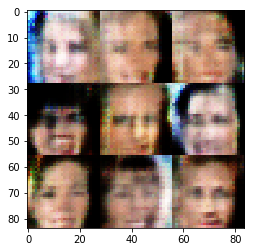

Epoch 1/1... Discriminator Loss: 1.1907... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.5125... Generator Loss: 1.7627
Epoch 1/1... Discriminator Loss: 0.6757... Generator Loss: 1.3267
Epoch 1/1... Discriminator Loss: 1.2724... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 0.7448... Generator Loss: 1.4200
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 2.1983
Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 4.4130
Epoch 1/1... Discriminator Loss: 0.4953... Generator Loss: 2.1235
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 0.9912... Generator Loss: 0.8979


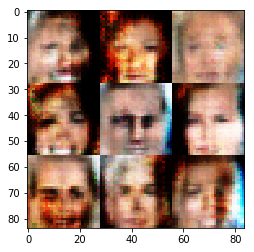

Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 2.5971... Generator Loss: 3.5600
Epoch 1/1... Discriminator Loss: 0.8618... Generator Loss: 1.2061
Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.1231... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 3.0528... Generator Loss: 0.0994
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 0.9810... Generator Loss: 1.3246
Epoch 1/1... Discriminator Loss: 0.8199... Generator Loss: 1.6238
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.7201


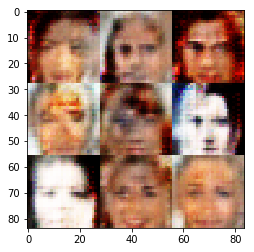

Epoch 1/1... Discriminator Loss: 1.1816... Generator Loss: 0.7363
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.6388
Epoch 1/1... Discriminator Loss: 1.1457... Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.4744
Epoch 1/1... Discriminator Loss: 0.8889... Generator Loss: 0.9618
Epoch 1/1... Discriminator Loss: 1.1926... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 0.4951... Generator Loss: 2.0660
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.8861
Epoch 1/1... Discriminator Loss: 0.8024... Generator Loss: 1.0134
Epoch 1/1... Discriminator Loss: 0.6165... Generator Loss: 1.5501


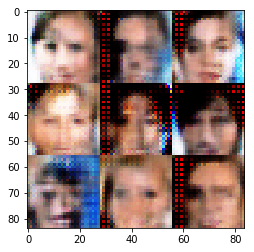

Epoch 1/1... Discriminator Loss: 1.6985... Generator Loss: 0.4046
Epoch 1/1... Discriminator Loss: 1.2108... Generator Loss: 0.7704
Epoch 1/1... Discriminator Loss: 1.4377... Generator Loss: 0.4203
Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 1.2112
Epoch 1/1... Discriminator Loss: 0.8202... Generator Loss: 1.0291
Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 1.1877
Epoch 1/1... Discriminator Loss: 0.6757... Generator Loss: 1.3668
Epoch 1/1... Discriminator Loss: 0.6782... Generator Loss: 2.2293
Epoch 1/1... Discriminator Loss: 0.7658... Generator Loss: 2.4033
Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 0.5750


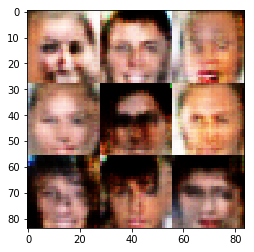

Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.4941
Epoch 1/1... Discriminator Loss: 0.8088... Generator Loss: 1.9976
Epoch 1/1... Discriminator Loss: 0.8558... Generator Loss: 1.4575
Epoch 1/1... Discriminator Loss: 1.6301... Generator Loss: 0.5459
Epoch 1/1... Discriminator Loss: 0.7184... Generator Loss: 1.2953
Epoch 1/1... Discriminator Loss: 0.9677... Generator Loss: 0.8800
Epoch 1/1... Discriminator Loss: 1.5335... Generator Loss: 0.3921
Epoch 1/1... Discriminator Loss: 1.1001... Generator Loss: 0.8761
Epoch 1/1... Discriminator Loss: 1.4829... Generator Loss: 0.9868
Epoch 1/1... Discriminator Loss: 1.5195... Generator Loss: 0.4380


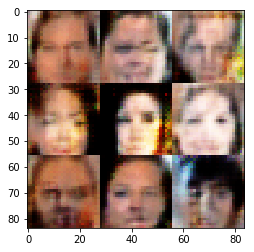

Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 1.8176
Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 1.7981
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 3.2240
Epoch 1/1... Discriminator Loss: 0.4163... Generator Loss: 2.8031
Epoch 1/1... Discriminator Loss: 0.8468... Generator Loss: 2.7790
Epoch 1/1... Discriminator Loss: 1.1009... Generator Loss: 1.4384
Epoch 1/1... Discriminator Loss: 0.7697... Generator Loss: 1.2917
Epoch 1/1... Discriminator Loss: 1.1135... Generator Loss: 0.9571
Epoch 1/1... Discriminator Loss: 0.9795... Generator Loss: 0.8151


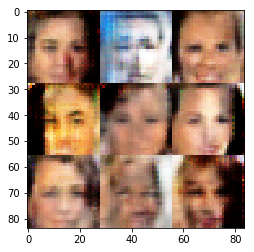

Epoch 1/1... Discriminator Loss: 0.7267... Generator Loss: 1.2443
Epoch 1/1... Discriminator Loss: 0.9637... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 0.9451... Generator Loss: 1.3140
Epoch 1/1... Discriminator Loss: 0.7859... Generator Loss: 1.8424
Epoch 1/1... Discriminator Loss: 1.8904... Generator Loss: 2.3748
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.4804
Epoch 1/1... Discriminator Loss: 0.6933... Generator Loss: 1.3809
Epoch 1/1... Discriminator Loss: 1.0748... Generator Loss: 0.6812
Epoch 1/1... Discriminator Loss: 0.5487... Generator Loss: 2.8327
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 0.9719


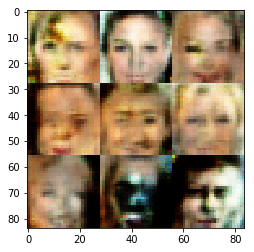

Epoch 1/1... Discriminator Loss: 1.1027... Generator Loss: 0.9115
Epoch 1/1... Discriminator Loss: 1.5372... Generator Loss: 1.6948
Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 0.8894
Epoch 1/1... Discriminator Loss: 1.5858... Generator Loss: 0.4064
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 1.8874
Epoch 1/1... Discriminator Loss: 0.7318... Generator Loss: 1.2618
Epoch 1/1... Discriminator Loss: 0.7612... Generator Loss: 1.3990
Epoch 1/1... Discriminator Loss: 1.1430... Generator Loss: 0.7562
Epoch 1/1... Discriminator Loss: 1.0412... Generator Loss: 0.9030
Epoch 1/1... Discriminator Loss: 0.4204... Generator Loss: 2.6601


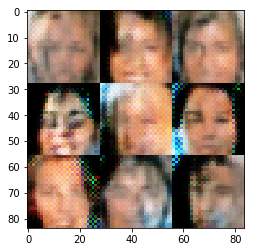

Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.5649
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 1.1956
Epoch 1/1... Discriminator Loss: 0.7527... Generator Loss: 1.2757
Epoch 1/1... Discriminator Loss: 0.6700... Generator Loss: 1.9014
Epoch 1/1... Discriminator Loss: 0.7603... Generator Loss: 1.4725
Epoch 1/1... Discriminator Loss: 0.8170... Generator Loss: 1.0489
Epoch 1/1... Discriminator Loss: 1.2535... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 0.8531... Generator Loss: 0.9592
Epoch 1/1... Discriminator Loss: 1.0162... Generator Loss: 1.0124
Epoch 1/1... Discriminator Loss: 1.0113... Generator Loss: 0.9355


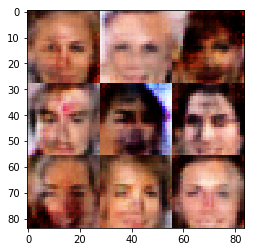

Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 2.2419
Epoch 1/1... Discriminator Loss: 0.7594... Generator Loss: 1.2842
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 1.1209
Epoch 1/1... Discriminator Loss: 1.0617... Generator Loss: 0.7985
Epoch 1/1... Discriminator Loss: 0.7046... Generator Loss: 1.5233
Epoch 1/1... Discriminator Loss: 0.8715... Generator Loss: 1.0274
Epoch 1/1... Discriminator Loss: 1.0403... Generator Loss: 0.8691
Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.6363
Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 2.1612
Epoch 1/1... Discriminator Loss: 2.0652... Generator Loss: 1.8186


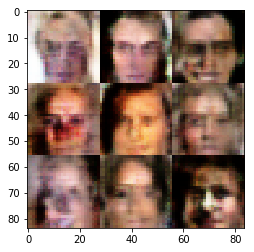

Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.5982
Epoch 1/1... Discriminator Loss: 0.4761... Generator Loss: 2.4590
Epoch 1/1... Discriminator Loss: 1.1501... Generator Loss: 0.6629
Epoch 1/1... Discriminator Loss: 0.9875... Generator Loss: 1.0776
Epoch 1/1... Discriminator Loss: 1.2160... Generator Loss: 0.5898
Epoch 1/1... Discriminator Loss: 2.1218... Generator Loss: 0.2106
Epoch 1/1... Discriminator Loss: 1.0878... Generator Loss: 1.0389
Epoch 1/1... Discriminator Loss: 1.0163... Generator Loss: 0.9777
Epoch 1/1... Discriminator Loss: 0.8197... Generator Loss: 1.0571
Epoch 1/1... Discriminator Loss: 1.2840... Generator Loss: 0.5152


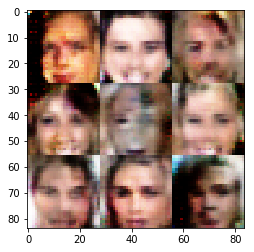

Epoch 1/1... Discriminator Loss: 0.9679... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.2880... Generator Loss: 1.5334
Epoch 1/1... Discriminator Loss: 0.7679... Generator Loss: 1.3172
Epoch 1/1... Discriminator Loss: 0.7846... Generator Loss: 1.1468
Epoch 1/1... Discriminator Loss: 1.2534... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 0.8420... Generator Loss: 1.0815
Epoch 1/1... Discriminator Loss: 1.8297... Generator Loss: 2.0321
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.6498
Epoch 1/1... Discriminator Loss: 0.9579... Generator Loss: 1.4987
Epoch 1/1... Discriminator Loss: 0.9231... Generator Loss: 1.6480


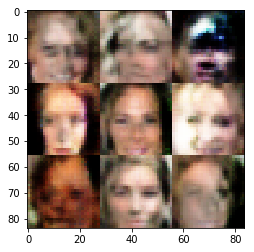

Epoch 1/1... Discriminator Loss: 0.7162... Generator Loss: 2.9113
Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 1.0443
Epoch 1/1... Discriminator Loss: 0.5845... Generator Loss: 1.7126
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 1.5667


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = .001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

Epoch 1/1... Discriminator Loss: 1.6446... Generator Loss: 0.3925


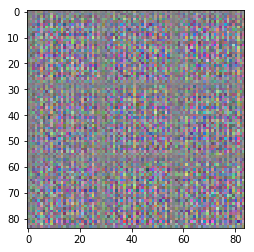

Epoch 1/1... Discriminator Loss: 0.7705... Generator Loss: 1.2235
Epoch 1/1... Discriminator Loss: 0.6318... Generator Loss: 1.7701
Epoch 1/1... Discriminator Loss: 0.6472... Generator Loss: 1.5130
Epoch 1/1... Discriminator Loss: 0.4610... Generator Loss: 2.4996
Epoch 1/1... Discriminator Loss: 0.5594... Generator Loss: 4.2111
Epoch 1/1... Discriminator Loss: 0.4283... Generator Loss: 2.7031
Epoch 1/1... Discriminator Loss: 0.4121... Generator Loss: 6.4007
Epoch 1/1... Discriminator Loss: 0.4762... Generator Loss: 2.3741
Epoch 1/1... Discriminator Loss: 0.4326... Generator Loss: 3.6873
Epoch 1/1... Discriminator Loss: 0.5526... Generator Loss: 2.3260


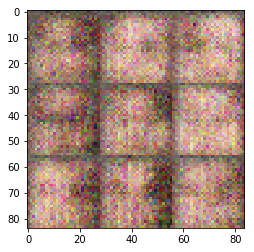

Epoch 1/1... Discriminator Loss: 0.9845... Generator Loss: 0.9759
Epoch 1/1... Discriminator Loss: 0.6082... Generator Loss: 1.9584
Epoch 1/1... Discriminator Loss: 0.6594... Generator Loss: 1.6287
Epoch 1/1... Discriminator Loss: 0.7030... Generator Loss: 2.0344
Epoch 1/1... Discriminator Loss: 0.6781... Generator Loss: 1.8972
Epoch 1/1... Discriminator Loss: 0.9474... Generator Loss: 3.5928
Epoch 1/1... Discriminator Loss: 0.7068... Generator Loss: 1.4088
Epoch 1/1... Discriminator Loss: 0.6158... Generator Loss: 2.2647
Epoch 1/1... Discriminator Loss: 0.5327... Generator Loss: 2.2219
Epoch 1/1... Discriminator Loss: 0.6810... Generator Loss: 2.7582


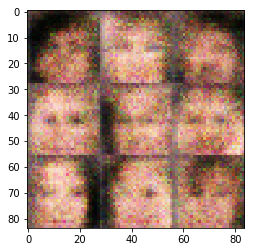

Epoch 1/1... Discriminator Loss: 0.5811... Generator Loss: 1.8249
Epoch 1/1... Discriminator Loss: 0.6666... Generator Loss: 2.6218
Epoch 1/1... Discriminator Loss: 0.4895... Generator Loss: 2.9652
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 1.8694
Epoch 1/1... Discriminator Loss: 1.9527... Generator Loss: 0.3067
Epoch 1/1... Discriminator Loss: 0.7861... Generator Loss: 1.1804
Epoch 1/1... Discriminator Loss: 0.5409... Generator Loss: 2.0199
Epoch 1/1... Discriminator Loss: 0.6852... Generator Loss: 3.7432
Epoch 1/1... Discriminator Loss: 0.5539... Generator Loss: 2.1985
Epoch 1/1... Discriminator Loss: 0.5660... Generator Loss: 1.9272


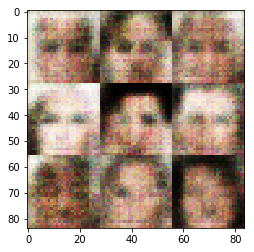

Epoch 1/1... Discriminator Loss: 0.7862... Generator Loss: 1.1786
Epoch 1/1... Discriminator Loss: 0.4844... Generator Loss: 2.6955
Epoch 1/1... Discriminator Loss: 1.7487... Generator Loss: 0.3577
Epoch 1/1... Discriminator Loss: 0.5920... Generator Loss: 1.8454
Epoch 1/1... Discriminator Loss: 0.6345... Generator Loss: 1.6427
Epoch 1/1... Discriminator Loss: 0.6911... Generator Loss: 1.4801
Epoch 1/1... Discriminator Loss: 0.7368... Generator Loss: 1.3409
Epoch 1/1... Discriminator Loss: 0.5989... Generator Loss: 1.8919
Epoch 1/1... Discriminator Loss: 0.8995... Generator Loss: 3.5331
Epoch 1/1... Discriminator Loss: 0.7768... Generator Loss: 1.2104


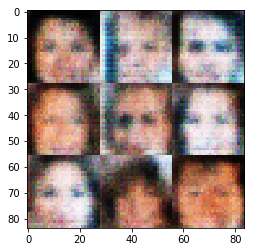

Epoch 1/1... Discriminator Loss: 0.6511... Generator Loss: 1.6481
Epoch 1/1... Discriminator Loss: 0.5647... Generator Loss: 2.1513
Epoch 1/1... Discriminator Loss: 0.5748... Generator Loss: 1.8284
Epoch 1/1... Discriminator Loss: 0.6744... Generator Loss: 1.5070
Epoch 1/1... Discriminator Loss: 2.9012... Generator Loss: 0.1502
Epoch 1/1... Discriminator Loss: 0.5303... Generator Loss: 2.0735
Epoch 1/1... Discriminator Loss: 0.5270... Generator Loss: 2.2957
Epoch 1/1... Discriminator Loss: 0.5585... Generator Loss: 2.0111
Epoch 1/1... Discriminator Loss: 0.5508... Generator Loss: 2.0994
Epoch 1/1... Discriminator Loss: 0.5091... Generator Loss: 2.0384


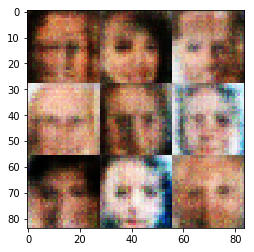

Epoch 1/1... Discriminator Loss: 0.4773... Generator Loss: 2.2694
Epoch 1/1... Discriminator Loss: 0.5416... Generator Loss: 2.0359
Epoch 1/1... Discriminator Loss: 1.5893... Generator Loss: 5.7719
Epoch 1/1... Discriminator Loss: 0.5756... Generator Loss: 1.9412
Epoch 1/1... Discriminator Loss: 0.6277... Generator Loss: 1.6714
Epoch 1/1... Discriminator Loss: 0.6296... Generator Loss: 1.5562
Epoch 1/1... Discriminator Loss: 0.9645... Generator Loss: 2.7734
Epoch 1/1... Discriminator Loss: 0.5207... Generator Loss: 2.3544
Epoch 1/1... Discriminator Loss: 0.6419... Generator Loss: 1.5624
Epoch 1/1... Discriminator Loss: 0.6673... Generator Loss: 1.4190


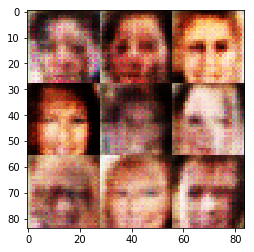

Epoch 1/1... Discriminator Loss: 2.1502... Generator Loss: 0.2730
Epoch 1/1... Discriminator Loss: 0.8952... Generator Loss: 1.0421
Epoch 1/1... Discriminator Loss: 0.5486... Generator Loss: 1.9673
Epoch 1/1... Discriminator Loss: 0.6686... Generator Loss: 2.4025
Epoch 1/1... Discriminator Loss: 0.5433... Generator Loss: 2.3067
Epoch 1/1... Discriminator Loss: 0.5362... Generator Loss: 2.9551
Epoch 1/1... Discriminator Loss: 0.5919... Generator Loss: 2.0879
Epoch 1/1... Discriminator Loss: 0.6562... Generator Loss: 1.5543
Epoch 1/1... Discriminator Loss: 2.1523... Generator Loss: 0.2170
Epoch 1/1... Discriminator Loss: 0.6898... Generator Loss: 1.4720


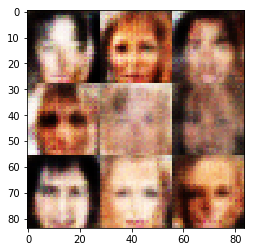

Epoch 1/1... Discriminator Loss: 0.5514... Generator Loss: 2.4836
Epoch 1/1... Discriminator Loss: 1.5187... Generator Loss: 0.4714
Epoch 1/1... Discriminator Loss: 0.7451... Generator Loss: 1.2784
Epoch 1/1... Discriminator Loss: 0.7501... Generator Loss: 1.2365
Epoch 1/1... Discriminator Loss: 1.0714... Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 0.6669... Generator Loss: 1.9319
Epoch 1/1... Discriminator Loss: 0.6862... Generator Loss: 1.4341
Epoch 1/1... Discriminator Loss: 0.7706... Generator Loss: 1.2446
Epoch 1/1... Discriminator Loss: 0.6109... Generator Loss: 2.6702
Epoch 1/1... Discriminator Loss: 0.8526... Generator Loss: 3.1252


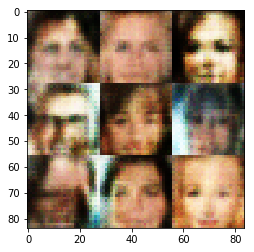

Epoch 1/1... Discriminator Loss: 0.5273... Generator Loss: 3.2239
Epoch 1/1... Discriminator Loss: 1.1165... Generator Loss: 3.8998
Epoch 1/1... Discriminator Loss: 0.8883... Generator Loss: 1.6748
Epoch 1/1... Discriminator Loss: 0.4768... Generator Loss: 2.6714
Epoch 1/1... Discriminator Loss: 0.9100... Generator Loss: 2.1223
Epoch 1/1... Discriminator Loss: 0.6433... Generator Loss: 1.5647
Epoch 1/1... Discriminator Loss: 0.5282... Generator Loss: 2.0307
Epoch 1/1... Discriminator Loss: 1.7510... Generator Loss: 0.3922
Epoch 1/1... Discriminator Loss: 0.7216... Generator Loss: 1.4587
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 3.2507


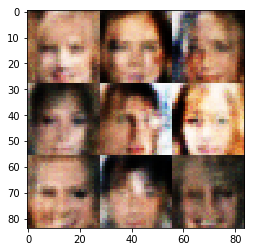

Epoch 1/1... Discriminator Loss: 0.6319... Generator Loss: 1.6248
Epoch 1/1... Discriminator Loss: 0.8106... Generator Loss: 1.0989
Epoch 1/1... Discriminator Loss: 0.4738... Generator Loss: 3.3096
Epoch 1/1... Discriminator Loss: 0.9448... Generator Loss: 2.7340
Epoch 1/1... Discriminator Loss: 0.6713... Generator Loss: 1.6381
Epoch 1/1... Discriminator Loss: 0.5704... Generator Loss: 1.8255
Epoch 1/1... Discriminator Loss: 1.1906... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 0.6453... Generator Loss: 1.6043
Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 0.4948
Epoch 1/1... Discriminator Loss: 0.5282... Generator Loss: 2.0149


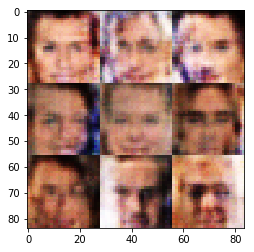

Epoch 1/1... Discriminator Loss: 1.8764... Generator Loss: 0.3143
Epoch 1/1... Discriminator Loss: 0.6307... Generator Loss: 1.8714
Epoch 1/1... Discriminator Loss: 0.9609... Generator Loss: 0.9156
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 0.6220... Generator Loss: 1.6727
Epoch 1/1... Discriminator Loss: 0.9432... Generator Loss: 0.8912
Epoch 1/1... Discriminator Loss: 0.7578... Generator Loss: 1.2136
Epoch 1/1... Discriminator Loss: 0.7269... Generator Loss: 3.5896
Epoch 1/1... Discriminator Loss: 0.7881... Generator Loss: 2.7280
Epoch 1/1... Discriminator Loss: 0.6373... Generator Loss: 1.5250


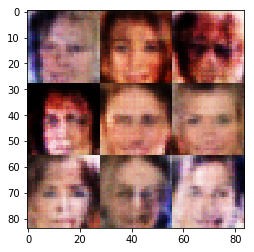

Epoch 1/1... Discriminator Loss: 1.9515... Generator Loss: 0.2832
Epoch 1/1... Discriminator Loss: 0.5521... Generator Loss: 2.1395
Epoch 1/1... Discriminator Loss: 0.8141... Generator Loss: 2.3868
Epoch 1/1... Discriminator Loss: 0.8639... Generator Loss: 1.1122
Epoch 1/1... Discriminator Loss: 0.5208... Generator Loss: 2.2169
Epoch 1/1... Discriminator Loss: 0.6668... Generator Loss: 1.6002
Epoch 1/1... Discriminator Loss: 1.7465... Generator Loss: 0.3836
Epoch 1/1... Discriminator Loss: 0.6419... Generator Loss: 1.7211
Epoch 1/1... Discriminator Loss: 0.5796... Generator Loss: 1.8319
Epoch 1/1... Discriminator Loss: 1.0789... Generator Loss: 2.4848


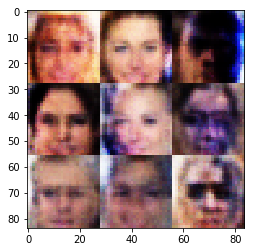

Epoch 1/1... Discriminator Loss: 0.8103... Generator Loss: 4.3043
Epoch 1/1... Discriminator Loss: 0.6848... Generator Loss: 3.6082
Epoch 1/1... Discriminator Loss: 0.7352... Generator Loss: 1.7206
Epoch 1/1... Discriminator Loss: 0.6977... Generator Loss: 1.5364
Epoch 1/1... Discriminator Loss: 1.1045... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 0.7740... Generator Loss: 1.1813
Epoch 1/1... Discriminator Loss: 1.8618... Generator Loss: 0.2916
Epoch 1/1... Discriminator Loss: 0.8154... Generator Loss: 1.2967
Epoch 1/1... Discriminator Loss: 0.4746... Generator Loss: 2.6419
Epoch 1/1... Discriminator Loss: 0.4772... Generator Loss: 2.6174


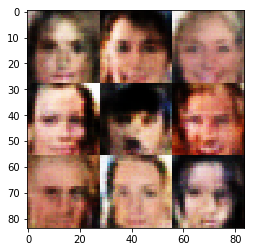

Epoch 1/1... Discriminator Loss: 0.6891... Generator Loss: 3.1757
Epoch 1/1... Discriminator Loss: 0.8920... Generator Loss: 2.1493
Epoch 1/1... Discriminator Loss: 0.8735... Generator Loss: 1.0080
Epoch 1/1... Discriminator Loss: 1.0363... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 0.7116... Generator Loss: 1.2662
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.5104
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 0.9640
Epoch 1/1... Discriminator Loss: 0.6855... Generator Loss: 1.3719
Epoch 1/1... Discriminator Loss: 0.9912... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 0.3924... Generator Loss: 3.8965


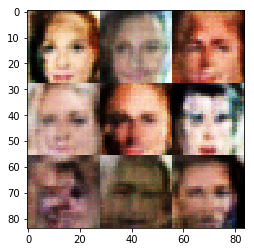

Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 3.0560
Epoch 1/1... Discriminator Loss: 0.5790... Generator Loss: 1.8015
Epoch 1/1... Discriminator Loss: 0.6208... Generator Loss: 1.6361
Epoch 1/1... Discriminator Loss: 0.8217... Generator Loss: 1.0587
Epoch 1/1... Discriminator Loss: 0.9688... Generator Loss: 0.8842
Epoch 1/1... Discriminator Loss: 0.6419... Generator Loss: 1.9942
Epoch 1/1... Discriminator Loss: 0.4718... Generator Loss: 3.0337
Epoch 1/1... Discriminator Loss: 2.1158... Generator Loss: 4.4069
Epoch 1/1... Discriminator Loss: 0.4888... Generator Loss: 2.3845
Epoch 1/1... Discriminator Loss: 0.8207... Generator Loss: 2.5634


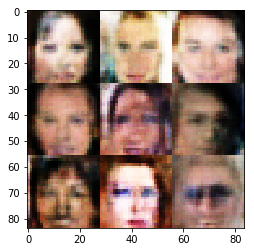

Epoch 1/1... Discriminator Loss: 0.6586... Generator Loss: 1.5149
Epoch 1/1... Discriminator Loss: 0.9057... Generator Loss: 0.9447
Epoch 1/1... Discriminator Loss: 0.8073... Generator Loss: 1.1428
Epoch 1/1... Discriminator Loss: 0.7208... Generator Loss: 1.2832
Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.5877
Epoch 1/1... Discriminator Loss: 0.4417... Generator Loss: 2.6659
Epoch 1/1... Discriminator Loss: 0.4527... Generator Loss: 3.6112
Epoch 1/1... Discriminator Loss: 0.4568... Generator Loss: 2.5371
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 2.5191
Epoch 1/1... Discriminator Loss: 0.6799... Generator Loss: 1.7038


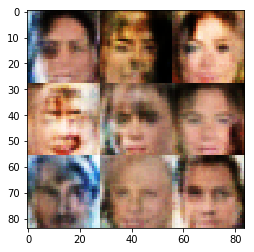

Epoch 1/1... Discriminator Loss: 0.7127... Generator Loss: 1.3499
Epoch 1/1... Discriminator Loss: 0.8100... Generator Loss: 1.1862
Epoch 1/1... Discriminator Loss: 0.6500... Generator Loss: 1.4260
Epoch 1/1... Discriminator Loss: 0.5914... Generator Loss: 1.6367
Epoch 1/1... Discriminator Loss: 0.9899... Generator Loss: 0.8839
Epoch 1/1... Discriminator Loss: 0.6091... Generator Loss: 1.6507
Epoch 1/1... Discriminator Loss: 0.7824... Generator Loss: 1.1747
Epoch 1/1... Discriminator Loss: 1.8967... Generator Loss: 0.3104
Epoch 1/1... Discriminator Loss: 0.8755... Generator Loss: 1.1518
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.5776


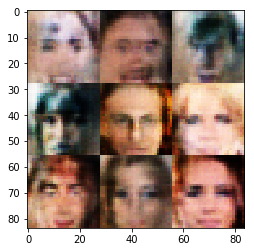

Epoch 1/1... Discriminator Loss: 0.5336... Generator Loss: 2.0673
Epoch 1/1... Discriminator Loss: 0.4422... Generator Loss: 2.7961
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.4771
Epoch 1/1... Discriminator Loss: 1.0341... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 0.9389... Generator Loss: 0.9127
Epoch 1/1... Discriminator Loss: 0.4177... Generator Loss: 3.0357
Epoch 1/1... Discriminator Loss: 0.4003... Generator Loss: 3.5899
Epoch 1/1... Discriminator Loss: 0.4627... Generator Loss: 3.7144
Epoch 1/1... Discriminator Loss: 0.4555... Generator Loss: 4.0701


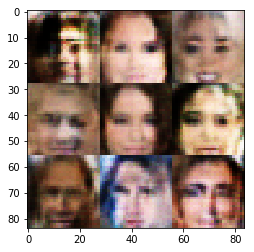

Epoch 1/1... Discriminator Loss: 2.0307... Generator Loss: 4.8012
Epoch 1/1... Discriminator Loss: 0.6763... Generator Loss: 1.5198
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 0.5413... Generator Loss: 2.0351
Epoch 1/1... Discriminator Loss: 0.4880... Generator Loss: 2.4152
Epoch 1/1... Discriminator Loss: 0.7124... Generator Loss: 1.3532
Epoch 1/1... Discriminator Loss: 0.7893... Generator Loss: 1.2861
Epoch 1/1... Discriminator Loss: 0.8860... Generator Loss: 1.9515
Epoch 1/1... Discriminator Loss: 0.7231... Generator Loss: 1.3081
Epoch 1/1... Discriminator Loss: 0.6312... Generator Loss: 1.5958


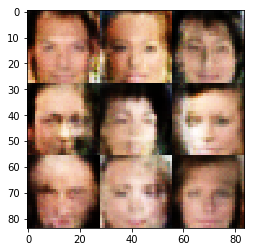

Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 0.4670... Generator Loss: 2.8156
Epoch 1/1... Discriminator Loss: 0.5831... Generator Loss: 1.7334
Epoch 1/1... Discriminator Loss: 0.5056... Generator Loss: 2.0873
Epoch 1/1... Discriminator Loss: 0.6259... Generator Loss: 1.5547
Epoch 1/1... Discriminator Loss: 0.4516... Generator Loss: 2.4464
Epoch 1/1... Discriminator Loss: 0.5312... Generator Loss: 1.9910
Epoch 1/1... Discriminator Loss: 0.5311... Generator Loss: 1.9683
Epoch 1/1... Discriminator Loss: 0.4013... Generator Loss: 3.3386
Epoch 1/1... Discriminator Loss: 1.5081... Generator Loss: 0.5093


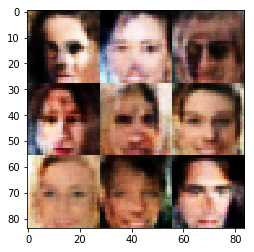

Epoch 1/1... Discriminator Loss: 0.8671... Generator Loss: 1.8042
Epoch 1/1... Discriminator Loss: 0.7698... Generator Loss: 1.2913
Epoch 1/1... Discriminator Loss: 0.8255... Generator Loss: 1.3123
Epoch 1/1... Discriminator Loss: 0.9365... Generator Loss: 2.3096
Epoch 1/1... Discriminator Loss: 0.8048... Generator Loss: 1.1626
Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.1556... Generator Loss: 0.6767
Epoch 1/1... Discriminator Loss: 0.8300... Generator Loss: 1.1072
Epoch 1/1... Discriminator Loss: 0.8247... Generator Loss: 1.6544
Epoch 1/1... Discriminator Loss: 1.0617... Generator Loss: 0.7855


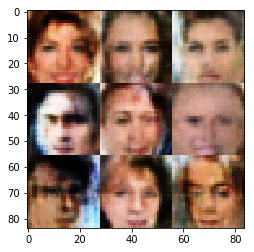

Epoch 1/1... Discriminator Loss: 1.4288... Generator Loss: 0.4914
Epoch 1/1... Discriminator Loss: 0.5048... Generator Loss: 2.5967
Epoch 1/1... Discriminator Loss: 0.5255... Generator Loss: 2.1944
Epoch 1/1... Discriminator Loss: 0.6455... Generator Loss: 1.4559
Epoch 1/1... Discriminator Loss: 0.5865... Generator Loss: 1.6826
Epoch 1/1... Discriminator Loss: 0.4593... Generator Loss: 2.6171
Epoch 1/1... Discriminator Loss: 0.4405... Generator Loss: 2.4971
Epoch 1/1... Discriminator Loss: 0.6072... Generator Loss: 1.7137
Epoch 1/1... Discriminator Loss: 0.4584... Generator Loss: 2.5969
Epoch 1/1... Discriminator Loss: 0.3985... Generator Loss: 3.2019


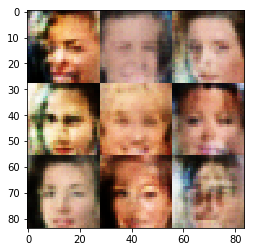

Epoch 1/1... Discriminator Loss: 0.3739... Generator Loss: 3.7789
Epoch 1/1... Discriminator Loss: 1.0432... Generator Loss: 2.8138
Epoch 1/1... Discriminator Loss: 0.6790... Generator Loss: 1.6496
Epoch 1/1... Discriminator Loss: 0.8654... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 1.0489... Generator Loss: 1.0475
Epoch 1/1... Discriminator Loss: 0.7609... Generator Loss: 1.6889
Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 2.9473
Epoch 1/1... Discriminator Loss: 0.8315... Generator Loss: 1.1071
Epoch 1/1... Discriminator Loss: 0.6873... Generator Loss: 1.4152
Epoch 1/1... Discriminator Loss: 0.8560... Generator Loss: 1.0409


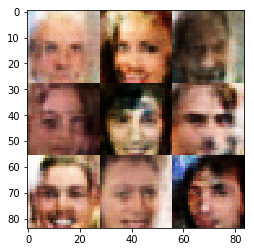

Epoch 1/1... Discriminator Loss: 0.4531... Generator Loss: 2.5359
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.5256
Epoch 1/1... Discriminator Loss: 0.7089... Generator Loss: 1.5531
Epoch 1/1... Discriminator Loss: 0.8030... Generator Loss: 1.1361
Epoch 1/1... Discriminator Loss: 1.0126... Generator Loss: 0.8479
Epoch 1/1... Discriminator Loss: 0.5365... Generator Loss: 3.8209
Epoch 1/1... Discriminator Loss: 0.4057... Generator Loss: 3.2146
Epoch 1/1... Discriminator Loss: 1.7010... Generator Loss: 0.3787
Epoch 1/1... Discriminator Loss: 0.7486... Generator Loss: 1.3138
Epoch 1/1... Discriminator Loss: 1.1922... Generator Loss: 0.7641


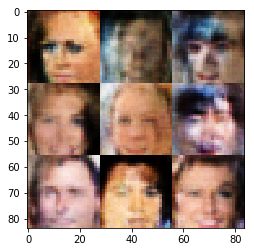

Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 0.6622... Generator Loss: 1.6156
Epoch 1/1... Discriminator Loss: 0.7800... Generator Loss: 1.1404
Epoch 1/1... Discriminator Loss: 0.8608... Generator Loss: 1.0424
Epoch 1/1... Discriminator Loss: 0.4160... Generator Loss: 2.9612
Epoch 1/1... Discriminator Loss: 0.4132... Generator Loss: 3.4451
Epoch 1/1... Discriminator Loss: 0.4694... Generator Loss: 2.3923
Epoch 1/1... Discriminator Loss: 0.4986... Generator Loss: 2.1257
Epoch 1/1... Discriminator Loss: 0.7250... Generator Loss: 1.3253
Epoch 1/1... Discriminator Loss: 0.4165... Generator Loss: 3.4303


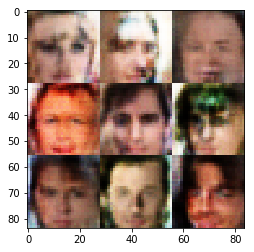

Epoch 1/1... Discriminator Loss: 0.4968... Generator Loss: 2.1218
Epoch 1/1... Discriminator Loss: 1.1789... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 0.7487... Generator Loss: 1.3427
Epoch 1/1... Discriminator Loss: 0.7644... Generator Loss: 1.3383
Epoch 1/1... Discriminator Loss: 0.7102... Generator Loss: 2.0873
Epoch 1/1... Discriminator Loss: 0.3868... Generator Loss: 4.1446
Epoch 1/1... Discriminator Loss: 0.5405... Generator Loss: 2.1477
Epoch 1/1... Discriminator Loss: 0.5872... Generator Loss: 2.3849
Epoch 1/1... Discriminator Loss: 0.3902... Generator Loss: 3.1936
Epoch 1/1... Discriminator Loss: 1.9104... Generator Loss: 4.1840


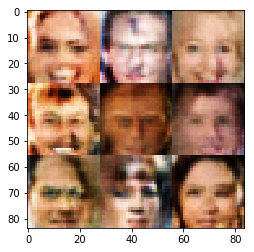

Epoch 1/1... Discriminator Loss: 0.8481... Generator Loss: 1.0875
Epoch 1/1... Discriminator Loss: 0.8235... Generator Loss: 1.1997
Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 0.7976
Epoch 1/1... Discriminator Loss: 0.8068... Generator Loss: 1.2212
Epoch 1/1... Discriminator Loss: 0.9127... Generator Loss: 0.9864
Epoch 1/1... Discriminator Loss: 0.9304... Generator Loss: 0.9188
Epoch 1/1... Discriminator Loss: 0.6418... Generator Loss: 1.5257
Epoch 1/1... Discriminator Loss: 0.5043... Generator Loss: 2.4478
Epoch 1/1... Discriminator Loss: 0.4273... Generator Loss: 2.8687
Epoch 1/1... Discriminator Loss: 0.4204... Generator Loss: 2.8553


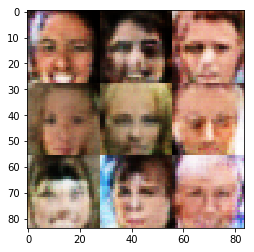

Epoch 1/1... Discriminator Loss: 0.7621... Generator Loss: 3.9122
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 2.3772
Epoch 1/1... Discriminator Loss: 0.7758... Generator Loss: 2.0990
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.5390
Epoch 1/1... Discriminator Loss: 1.0240... Generator Loss: 0.7653
Epoch 1/1... Discriminator Loss: 1.0010... Generator Loss: 0.9780
Epoch 1/1... Discriminator Loss: 0.4876... Generator Loss: 2.2365
Epoch 1/1... Discriminator Loss: 0.4312... Generator Loss: 2.9121
Epoch 1/1... Discriminator Loss: 0.4461... Generator Loss: 2.7257
Epoch 1/1... Discriminator Loss: 0.4975... Generator Loss: 2.4613


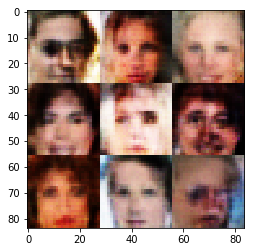

Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 3.0752
Epoch 1/1... Discriminator Loss: 0.7787... Generator Loss: 2.0720
Epoch 1/1... Discriminator Loss: 0.6349... Generator Loss: 1.7319
Epoch 1/1... Discriminator Loss: 0.5774... Generator Loss: 3.1300
Epoch 1/1... Discriminator Loss: 0.4174... Generator Loss: 2.8721
Epoch 1/1... Discriminator Loss: 0.6726... Generator Loss: 1.4102
Epoch 1/1... Discriminator Loss: 0.4568... Generator Loss: 3.5333
Epoch 1/1... Discriminator Loss: 1.1183... Generator Loss: 2.6464
Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 1.8106
Epoch 1/1... Discriminator Loss: 0.8069... Generator Loss: 1.1131


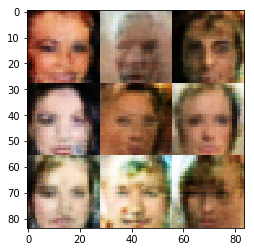

Epoch 1/1... Discriminator Loss: 0.5793... Generator Loss: 1.7575
Epoch 1/1... Discriminator Loss: 1.0835... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 0.4150... Generator Loss: 2.8978
Epoch 1/1... Discriminator Loss: 0.4141... Generator Loss: 3.4865
Epoch 1/1... Discriminator Loss: 0.5466... Generator Loss: 1.8526
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 1.0416
Epoch 1/1... Discriminator Loss: 0.4874... Generator Loss: 2.2334
Epoch 1/1... Discriminator Loss: 0.9131... Generator Loss: 0.9508
Epoch 1/1... Discriminator Loss: 0.6518... Generator Loss: 1.5772
Epoch 1/1... Discriminator Loss: 0.9157... Generator Loss: 1.9091


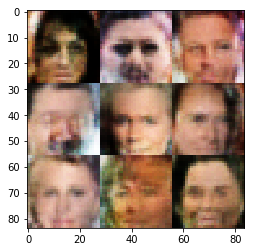

Epoch 1/1... Discriminator Loss: 0.6070... Generator Loss: 1.8012
Epoch 1/1... Discriminator Loss: 0.4616... Generator Loss: 3.6814
Epoch 1/1... Discriminator Loss: 0.4791... Generator Loss: 4.0434
Epoch 1/1... Discriminator Loss: 1.1345... Generator Loss: 4.1626
Epoch 1/1... Discriminator Loss: 0.9204... Generator Loss: 0.9342
Epoch 1/1... Discriminator Loss: 0.4940... Generator Loss: 2.1365
Epoch 1/1... Discriminator Loss: 0.4635... Generator Loss: 3.5890
Epoch 1/1... Discriminator Loss: 0.3850... Generator Loss: 4.0273
Epoch 1/1... Discriminator Loss: 0.4091... Generator Loss: 5.3125
Epoch 1/1... Discriminator Loss: 0.3658... Generator Loss: 4.3241


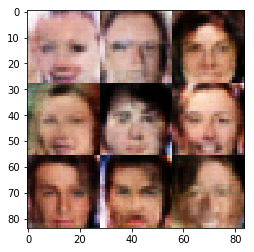

Epoch 1/1... Discriminator Loss: 0.7824... Generator Loss: 1.8085
Epoch 1/1... Discriminator Loss: 0.8030... Generator Loss: 1.1922
Epoch 1/1... Discriminator Loss: 0.7670... Generator Loss: 1.2651
Epoch 1/1... Discriminator Loss: 0.8534... Generator Loss: 1.1242
Epoch 1/1... Discriminator Loss: 0.7864... Generator Loss: 1.4320
Epoch 1/1... Discriminator Loss: 1.1114... Generator Loss: 3.1994


In [13]:
batch_size = 64
z_dim = 100
learning_rate = .0001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

Epoch 1/1... Discriminator Loss: 2.0549... Generator Loss: 0.2421


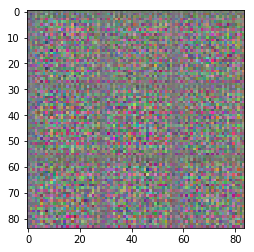

Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.5419
Epoch 1/1... Discriminator Loss: 0.9314... Generator Loss: 0.9054
Epoch 1/1... Discriminator Loss: 0.9358... Generator Loss: 0.8979
Epoch 1/1... Discriminator Loss: 0.6461... Generator Loss: 1.4626
Epoch 1/1... Discriminator Loss: 0.8160... Generator Loss: 1.1178
Epoch 1/1... Discriminator Loss: 0.5885... Generator Loss: 1.6221
Epoch 1/1... Discriminator Loss: 0.7263... Generator Loss: 1.2568
Epoch 1/1... Discriminator Loss: 0.4825... Generator Loss: 2.1534
Epoch 1/1... Discriminator Loss: 0.4636... Generator Loss: 2.2696
Epoch 1/1... Discriminator Loss: 0.7638... Generator Loss: 1.9499


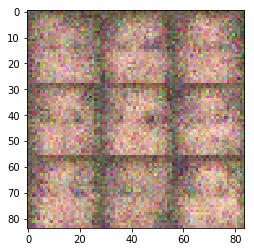

Epoch 1/1... Discriminator Loss: 0.5369... Generator Loss: 2.2214
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 0.8531... Generator Loss: 1.2214
Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 0.5485
Epoch 1/1... Discriminator Loss: 0.7061... Generator Loss: 1.4033
Epoch 1/1... Discriminator Loss: 0.9072... Generator Loss: 1.1637
Epoch 1/1... Discriminator Loss: 0.7905... Generator Loss: 1.2349
Epoch 1/1... Discriminator Loss: 0.7301... Generator Loss: 3.4752
Epoch 1/1... Discriminator Loss: 0.7510... Generator Loss: 1.2438
Epoch 1/1... Discriminator Loss: 0.5489... Generator Loss: 2.5786


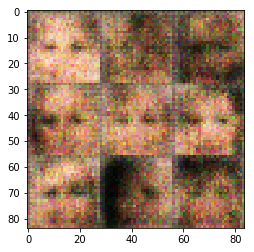

Epoch 1/1... Discriminator Loss: 0.5495... Generator Loss: 1.8977
Epoch 1/1... Discriminator Loss: 0.7328... Generator Loss: 1.4115
Epoch 1/1... Discriminator Loss: 0.6485... Generator Loss: 1.5990
Epoch 1/1... Discriminator Loss: 1.1984... Generator Loss: 0.6543
Epoch 1/1... Discriminator Loss: 0.6258... Generator Loss: 1.6586
Epoch 1/1... Discriminator Loss: 0.6769... Generator Loss: 1.5165
Epoch 1/1... Discriminator Loss: 0.6008... Generator Loss: 2.0468
Epoch 1/1... Discriminator Loss: 0.6466... Generator Loss: 1.5486
Epoch 1/1... Discriminator Loss: 0.6799... Generator Loss: 3.0622
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 0.6118


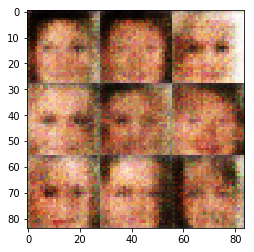

Epoch 1/1... Discriminator Loss: 0.7441... Generator Loss: 3.3778
Epoch 1/1... Discriminator Loss: 0.7528... Generator Loss: 1.1927
Epoch 1/1... Discriminator Loss: 0.7389... Generator Loss: 1.2513
Epoch 1/1... Discriminator Loss: 0.8090... Generator Loss: 1.2038
Epoch 1/1... Discriminator Loss: 1.1316... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 0.9846... Generator Loss: 0.8373
Epoch 1/1... Discriminator Loss: 0.5569... Generator Loss: 2.0543
Epoch 1/1... Discriminator Loss: 0.9769... Generator Loss: 0.8568
Epoch 1/1... Discriminator Loss: 0.6445... Generator Loss: 1.8348
Epoch 1/1... Discriminator Loss: 0.7901... Generator Loss: 1.1926


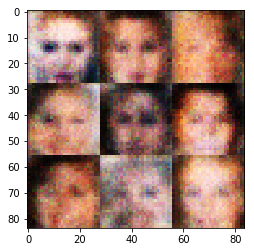

Epoch 1/1... Discriminator Loss: 0.7205... Generator Loss: 2.4662
Epoch 1/1... Discriminator Loss: 0.7536... Generator Loss: 1.2309
Epoch 1/1... Discriminator Loss: 0.8158... Generator Loss: 2.5304
Epoch 1/1... Discriminator Loss: 0.7746... Generator Loss: 1.1900
Epoch 1/1... Discriminator Loss: 1.6711... Generator Loss: 0.3687
Epoch 1/1... Discriminator Loss: 0.8578... Generator Loss: 1.0928
Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 1.0584
Epoch 1/1... Discriminator Loss: 0.6681... Generator Loss: 1.5654
Epoch 1/1... Discriminator Loss: 0.5822... Generator Loss: 1.8748
Epoch 1/1... Discriminator Loss: 1.1522... Generator Loss: 0.6505


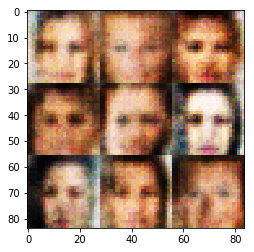

Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.8341
Epoch 1/1... Discriminator Loss: 1.3018... Generator Loss: 0.5537
Epoch 1/1... Discriminator Loss: 0.5419... Generator Loss: 2.0844
Epoch 1/1... Discriminator Loss: 0.8901... Generator Loss: 0.9978
Epoch 1/1... Discriminator Loss: 0.7478... Generator Loss: 1.3076
Epoch 1/1... Discriminator Loss: 0.9692... Generator Loss: 0.8670
Epoch 1/1... Discriminator Loss: 0.7441... Generator Loss: 1.6942
Epoch 1/1... Discriminator Loss: 0.7584... Generator Loss: 1.2328
Epoch 1/1... Discriminator Loss: 0.7439... Generator Loss: 1.3412
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.4825


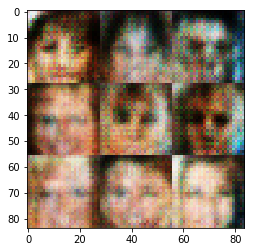

Epoch 1/1... Discriminator Loss: 0.7541... Generator Loss: 1.4095
Epoch 1/1... Discriminator Loss: 0.6874... Generator Loss: 1.6704
Epoch 1/1... Discriminator Loss: 0.6159... Generator Loss: 1.5802
Epoch 1/1... Discriminator Loss: 0.6429... Generator Loss: 1.9436
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 0.8536
Epoch 1/1... Discriminator Loss: 0.7385... Generator Loss: 1.5009
Epoch 1/1... Discriminator Loss: 1.2647... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.0173
Epoch 1/1... Discriminator Loss: 0.7597... Generator Loss: 1.8479
Epoch 1/1... Discriminator Loss: 0.8608... Generator Loss: 1.0314


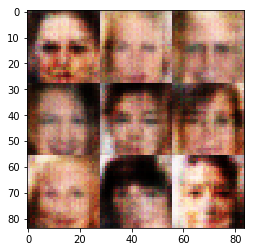

Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 0.5471
Epoch 1/1... Discriminator Loss: 1.4367... Generator Loss: 0.4942
Epoch 1/1... Discriminator Loss: 1.2659... Generator Loss: 0.5917
Epoch 1/1... Discriminator Loss: 1.4983... Generator Loss: 0.4464
Epoch 1/1... Discriminator Loss: 1.6836... Generator Loss: 0.3722
Epoch 1/1... Discriminator Loss: 0.7041... Generator Loss: 1.4286
Epoch 1/1... Discriminator Loss: 0.9293... Generator Loss: 0.9537
Epoch 1/1... Discriminator Loss: 0.6749... Generator Loss: 1.7678
Epoch 1/1... Discriminator Loss: 0.8199... Generator Loss: 1.5312
Epoch 1/1... Discriminator Loss: 0.8397... Generator Loss: 1.9134


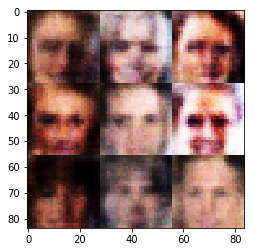

Epoch 1/1... Discriminator Loss: 0.9230... Generator Loss: 1.0811
Epoch 1/1... Discriminator Loss: 1.5707... Generator Loss: 4.0804
Epoch 1/1... Discriminator Loss: 1.0876... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 0.7874... Generator Loss: 2.1406
Epoch 1/1... Discriminator Loss: 0.7288... Generator Loss: 1.7128
Epoch 1/1... Discriminator Loss: 0.8998... Generator Loss: 1.3223
Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 1.0139
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.2035... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 0.6990... Generator Loss: 1.9669


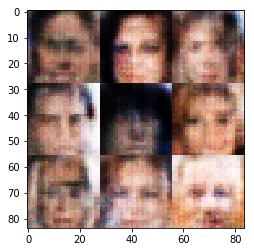

Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 0.7088
Epoch 1/1... Discriminator Loss: 0.7734... Generator Loss: 1.2603
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 0.8219
Epoch 1/1... Discriminator Loss: 0.7479... Generator Loss: 1.2765
Epoch 1/1... Discriminator Loss: 0.5950... Generator Loss: 1.6936
Epoch 1/1... Discriminator Loss: 0.8192... Generator Loss: 1.7481
Epoch 1/1... Discriminator Loss: 0.8271... Generator Loss: 1.2299
Epoch 1/1... Discriminator Loss: 0.6122... Generator Loss: 1.8562
Epoch 1/1... Discriminator Loss: 0.8946... Generator Loss: 2.0400
Epoch 1/1... Discriminator Loss: 1.1779... Generator Loss: 0.6120


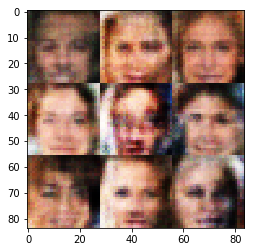

Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 0.9987
Epoch 1/1... Discriminator Loss: 1.4392... Generator Loss: 0.4627
Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 1.6198
Epoch 1/1... Discriminator Loss: 0.5884... Generator Loss: 1.7743
Epoch 1/1... Discriminator Loss: 0.7003... Generator Loss: 1.3744
Epoch 1/1... Discriminator Loss: 1.2972... Generator Loss: 0.5600
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.5391
Epoch 1/1... Discriminator Loss: 0.6586... Generator Loss: 1.7835
Epoch 1/1... Discriminator Loss: 0.8276... Generator Loss: 1.9335
Epoch 1/1... Discriminator Loss: 1.6669... Generator Loss: 0.3406


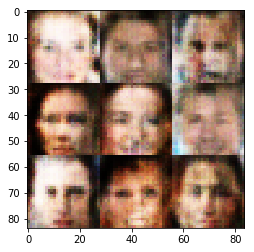

Epoch 1/1... Discriminator Loss: 0.7060... Generator Loss: 1.3540
Epoch 1/1... Discriminator Loss: 2.0721... Generator Loss: 0.2560
Epoch 1/1... Discriminator Loss: 0.6641... Generator Loss: 1.7038
Epoch 1/1... Discriminator Loss: 0.6906... Generator Loss: 1.8855
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 1.9612
Epoch 1/1... Discriminator Loss: 1.6195... Generator Loss: 0.3640
Epoch 1/1... Discriminator Loss: 0.9141... Generator Loss: 0.9148
Epoch 1/1... Discriminator Loss: 0.6774... Generator Loss: 1.8874
Epoch 1/1... Discriminator Loss: 1.7760... Generator Loss: 0.3534
Epoch 1/1... Discriminator Loss: 0.8748... Generator Loss: 1.0141


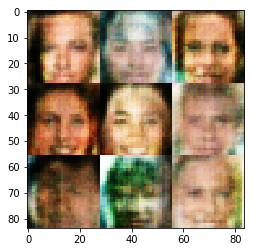

Epoch 1/1... Discriminator Loss: 0.7877... Generator Loss: 1.1770
Epoch 1/1... Discriminator Loss: 0.8221... Generator Loss: 1.0504
Epoch 1/1... Discriminator Loss: 0.7627... Generator Loss: 1.2652
Epoch 1/1... Discriminator Loss: 0.7692... Generator Loss: 1.2689
Epoch 1/1... Discriminator Loss: 1.6521... Generator Loss: 0.3764
Epoch 1/1... Discriminator Loss: 0.6766... Generator Loss: 1.3894
Epoch 1/1... Discriminator Loss: 0.5713... Generator Loss: 1.8247
Epoch 1/1... Discriminator Loss: 0.9739... Generator Loss: 2.5245
Epoch 1/1... Discriminator Loss: 0.7088... Generator Loss: 1.5391
Epoch 1/1... Discriminator Loss: 1.8120... Generator Loss: 0.3061


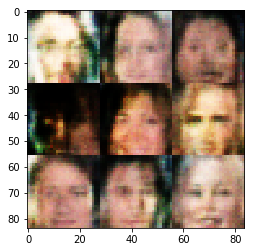

Epoch 1/1... Discriminator Loss: 0.7907... Generator Loss: 1.3456
Epoch 1/1... Discriminator Loss: 0.6279... Generator Loss: 1.7690
Epoch 1/1... Discriminator Loss: 0.6723... Generator Loss: 1.4785
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.4722
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 1.8430
Epoch 1/1... Discriminator Loss: 0.7150... Generator Loss: 1.3590
Epoch 1/1... Discriminator Loss: 1.1666... Generator Loss: 2.4804
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.0224
Epoch 1/1... Discriminator Loss: 0.6312... Generator Loss: 2.7850
Epoch 1/1... Discriminator Loss: 0.6084... Generator Loss: 2.4138


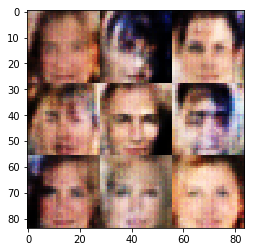

Epoch 1/1... Discriminator Loss: 0.6560... Generator Loss: 2.4431
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 2.3854
Epoch 1/1... Discriminator Loss: 0.8930... Generator Loss: 1.2136
Epoch 1/1... Discriminator Loss: 0.6185... Generator Loss: 1.6883
Epoch 1/1... Discriminator Loss: 0.7027... Generator Loss: 1.3425
Epoch 1/1... Discriminator Loss: 0.6915... Generator Loss: 1.3598
Epoch 1/1... Discriminator Loss: 0.6818... Generator Loss: 1.3996
Epoch 1/1... Discriminator Loss: 0.6767... Generator Loss: 1.3496
Epoch 1/1... Discriminator Loss: 0.5485... Generator Loss: 2.3022
Epoch 1/1... Discriminator Loss: 1.1666... Generator Loss: 4.3867


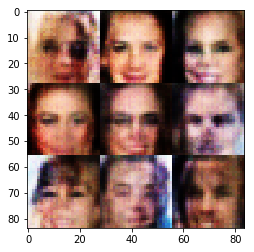

Epoch 1/1... Discriminator Loss: 0.8606... Generator Loss: 2.0746
Epoch 1/1... Discriminator Loss: 0.6828... Generator Loss: 2.4666
Epoch 1/1... Discriminator Loss: 0.7280... Generator Loss: 1.3459
Epoch 1/1... Discriminator Loss: 0.7999... Generator Loss: 1.1079
Epoch 1/1... Discriminator Loss: 0.5155... Generator Loss: 1.9770
Epoch 1/1... Discriminator Loss: 0.9187... Generator Loss: 0.9220
Epoch 1/1... Discriminator Loss: 0.5635... Generator Loss: 1.7751
Epoch 1/1... Discriminator Loss: 0.8964... Generator Loss: 4.1762
Epoch 1/1... Discriminator Loss: 1.0836... Generator Loss: 2.3255
Epoch 1/1... Discriminator Loss: 0.5362... Generator Loss: 2.4716


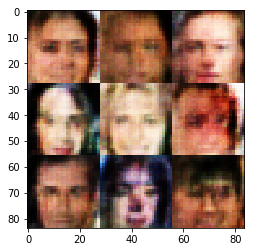

Epoch 1/1... Discriminator Loss: 0.7212... Generator Loss: 3.2455
Epoch 1/1... Discriminator Loss: 0.4816... Generator Loss: 2.5825
Epoch 1/1... Discriminator Loss: 0.5852... Generator Loss: 2.7110
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 0.8639
Epoch 1/1... Discriminator Loss: 0.4816... Generator Loss: 2.6438
Epoch 1/1... Discriminator Loss: 0.5424... Generator Loss: 2.7537
Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 4.7117
Epoch 1/1... Discriminator Loss: 0.4819... Generator Loss: 2.7740
Epoch 1/1... Discriminator Loss: 2.0322... Generator Loss: 0.2594
Epoch 1/1... Discriminator Loss: 0.7784... Generator Loss: 1.5027


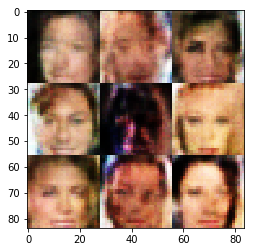

Epoch 1/1... Discriminator Loss: 0.7359... Generator Loss: 1.3083
Epoch 1/1... Discriminator Loss: 0.6050... Generator Loss: 1.7258
Epoch 1/1... Discriminator Loss: 0.4811... Generator Loss: 2.2017
Epoch 1/1... Discriminator Loss: 0.5063... Generator Loss: 2.5969
Epoch 1/1... Discriminator Loss: 0.5247... Generator Loss: 2.1610
Epoch 1/1... Discriminator Loss: 0.4384... Generator Loss: 3.0093
Epoch 1/1... Discriminator Loss: 0.4865... Generator Loss: 2.4856
Epoch 1/1... Discriminator Loss: 0.4797... Generator Loss: 2.8904
Epoch 1/1... Discriminator Loss: 0.8580... Generator Loss: 1.2618
Epoch 1/1... Discriminator Loss: 0.4789... Generator Loss: 3.0369


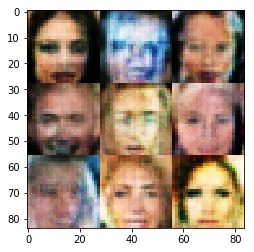

Epoch 1/1... Discriminator Loss: 0.3952... Generator Loss: 3.1553
Epoch 1/1... Discriminator Loss: 1.8540... Generator Loss: 2.8552
Epoch 1/1... Discriminator Loss: 0.4473... Generator Loss: 2.5820
Epoch 1/1... Discriminator Loss: 0.6093... Generator Loss: 1.6706
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 0.9780
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 0.6546... Generator Loss: 1.5099
Epoch 1/1... Discriminator Loss: 1.3340... Generator Loss: 0.5605
Epoch 1/1... Discriminator Loss: 0.5894... Generator Loss: 1.7502
Epoch 1/1... Discriminator Loss: 0.8221... Generator Loss: 1.2011


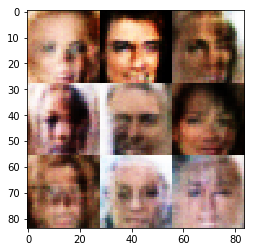

Epoch 1/1... Discriminator Loss: 0.8395... Generator Loss: 1.0850
Epoch 1/1... Discriminator Loss: 0.8058... Generator Loss: 1.1111
Epoch 1/1... Discriminator Loss: 0.9404... Generator Loss: 0.9097
Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 1.3109
Epoch 1/1... Discriminator Loss: 0.4775... Generator Loss: 2.1972
Epoch 1/1... Discriminator Loss: 1.8318... Generator Loss: 0.3524
Epoch 1/1... Discriminator Loss: 0.9210... Generator Loss: 0.9183
Epoch 1/1... Discriminator Loss: 0.5675... Generator Loss: 1.7198
Epoch 1/1... Discriminator Loss: 0.6749... Generator Loss: 1.4260
Epoch 1/1... Discriminator Loss: 1.0932... Generator Loss: 0.7430


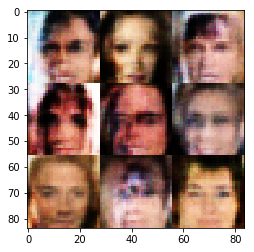

Epoch 1/1... Discriminator Loss: 0.5464... Generator Loss: 1.9448
Epoch 1/1... Discriminator Loss: 0.6809... Generator Loss: 1.3482
Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 3.0925
Epoch 1/1... Discriminator Loss: 0.6130... Generator Loss: 1.6040
Epoch 1/1... Discriminator Loss: 0.8175... Generator Loss: 1.0942
Epoch 1/1... Discriminator Loss: 1.1945... Generator Loss: 0.7327
Epoch 1/1... Discriminator Loss: 0.4767... Generator Loss: 2.5372
Epoch 1/1... Discriminator Loss: 0.4786... Generator Loss: 2.3511
Epoch 1/1... Discriminator Loss: 0.6448... Generator Loss: 1.5622
Epoch 1/1... Discriminator Loss: 0.4537... Generator Loss: 2.9374


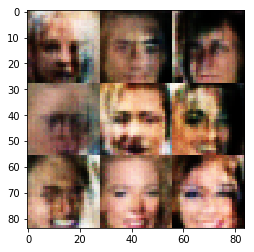

Epoch 1/1... Discriminator Loss: 0.5157... Generator Loss: 3.6078
Epoch 1/1... Discriminator Loss: 0.4366... Generator Loss: 2.7264
Epoch 1/1... Discriminator Loss: 1.1351... Generator Loss: 4.5594
Epoch 1/1... Discriminator Loss: 0.4498... Generator Loss: 4.7061
Epoch 1/1... Discriminator Loss: 0.6572... Generator Loss: 4.2019
Epoch 1/1... Discriminator Loss: 0.4366... Generator Loss: 3.5789
Epoch 1/1... Discriminator Loss: 0.5269... Generator Loss: 4.0752
Epoch 1/1... Discriminator Loss: 0.3677... Generator Loss: 3.6921
Epoch 1/1... Discriminator Loss: 0.4737... Generator Loss: 4.2761
Epoch 1/1... Discriminator Loss: 0.3932... Generator Loss: 4.3970


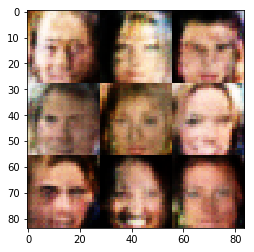

Epoch 1/1... Discriminator Loss: 0.4072... Generator Loss: 4.8235
Epoch 1/1... Discriminator Loss: 0.7569... Generator Loss: 2.2932
Epoch 1/1... Discriminator Loss: 0.5584... Generator Loss: 1.9421
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 0.6560... Generator Loss: 3.9774
Epoch 1/1... Discriminator Loss: 0.4485... Generator Loss: 3.5407
Epoch 1/1... Discriminator Loss: 0.4751... Generator Loss: 2.2594
Epoch 1/1... Discriminator Loss: 0.7711... Generator Loss: 1.6088
Epoch 1/1... Discriminator Loss: 0.3859... Generator Loss: 4.0945
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 2.8740


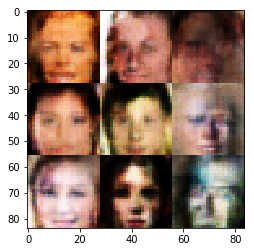

Epoch 1/1... Discriminator Loss: 0.7408... Generator Loss: 6.1989
Epoch 1/1... Discriminator Loss: 0.4026... Generator Loss: 3.0525
Epoch 1/1... Discriminator Loss: 0.3503... Generator Loss: 4.6743
Epoch 1/1... Discriminator Loss: 0.5021... Generator Loss: 2.0101
Epoch 1/1... Discriminator Loss: 2.0694... Generator Loss: 3.9054
Epoch 1/1... Discriminator Loss: 0.4361... Generator Loss: 3.2964
Epoch 1/1... Discriminator Loss: 0.5149... Generator Loss: 2.2290
Epoch 1/1... Discriminator Loss: 0.4174... Generator Loss: 3.6497
Epoch 1/1... Discriminator Loss: 0.3542... Generator Loss: 5.0172
Epoch 1/1... Discriminator Loss: 0.4379... Generator Loss: 2.6934


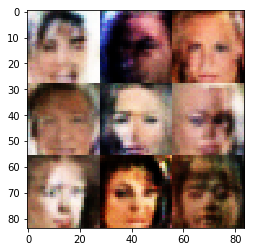

Epoch 1/1... Discriminator Loss: 0.5132... Generator Loss: 2.1606
Epoch 1/1... Discriminator Loss: 0.8520... Generator Loss: 1.0267
Epoch 1/1... Discriminator Loss: 0.4293... Generator Loss: 2.7339
Epoch 1/1... Discriminator Loss: 0.3973... Generator Loss: 4.3862
Epoch 1/1... Discriminator Loss: 0.5324... Generator Loss: 1.8208
Epoch 1/1... Discriminator Loss: 0.3902... Generator Loss: 3.1636
Epoch 1/1... Discriminator Loss: 1.2638... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 0.4811... Generator Loss: 2.2921
Epoch 1/1... Discriminator Loss: 0.3816... Generator Loss: 3.2642
Epoch 1/1... Discriminator Loss: 0.4454... Generator Loss: 4.3307


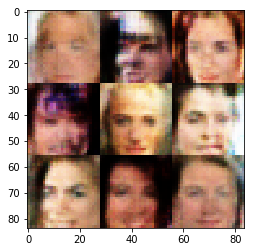

Epoch 1/1... Discriminator Loss: 0.4395... Generator Loss: 4.7597
Epoch 1/1... Discriminator Loss: 0.6746... Generator Loss: 5.2393
Epoch 1/1... Discriminator Loss: 0.4913... Generator Loss: 2.0915
Epoch 1/1... Discriminator Loss: 0.4180... Generator Loss: 2.9332
Epoch 1/1... Discriminator Loss: 0.3786... Generator Loss: 3.6050
Epoch 1/1... Discriminator Loss: 2.0389... Generator Loss: 0.2725
Epoch 1/1... Discriminator Loss: 0.6329... Generator Loss: 1.5621
Epoch 1/1... Discriminator Loss: 1.1649... Generator Loss: 0.6432
Epoch 1/1... Discriminator Loss: 0.7007... Generator Loss: 1.3307
Epoch 1/1... Discriminator Loss: 0.9775... Generator Loss: 0.8702


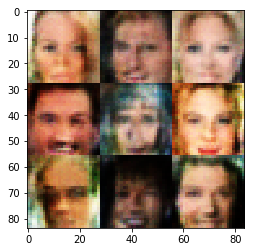

Epoch 1/1... Discriminator Loss: 0.6886... Generator Loss: 3.1009
Epoch 1/1... Discriminator Loss: 0.3641... Generator Loss: 4.0822
Epoch 1/1... Discriminator Loss: 1.0909... Generator Loss: 0.7534
Epoch 1/1... Discriminator Loss: 0.6100... Generator Loss: 4.2537
Epoch 1/1... Discriminator Loss: 0.4351... Generator Loss: 2.5374
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 0.7759
Epoch 1/1... Discriminator Loss: 0.4171... Generator Loss: 3.3591
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 4.5066
Epoch 1/1... Discriminator Loss: 0.3567... Generator Loss: 3.9796
Epoch 1/1... Discriminator Loss: 0.5281... Generator Loss: 3.4084


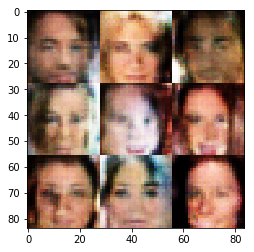

Epoch 1/1... Discriminator Loss: 0.4786... Generator Loss: 2.6177
Epoch 1/1... Discriminator Loss: 0.9825... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 0.9359... Generator Loss: 4.6260
Epoch 1/1... Discriminator Loss: 0.4664... Generator Loss: 4.0998
Epoch 1/1... Discriminator Loss: 0.8760... Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 0.6051... Generator Loss: 1.6083
Epoch 1/1... Discriminator Loss: 0.6167... Generator Loss: 1.6590
Epoch 1/1... Discriminator Loss: 0.4042... Generator Loss: 3.0016
Epoch 1/1... Discriminator Loss: 0.4393... Generator Loss: 4.7142
Epoch 1/1... Discriminator Loss: 0.6927... Generator Loss: 3.7050


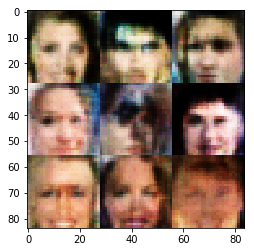

Epoch 1/1... Discriminator Loss: 0.4504... Generator Loss: 2.4465
Epoch 1/1... Discriminator Loss: 0.3546... Generator Loss: 4.4547
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 4.3419
Epoch 1/1... Discriminator Loss: 0.4663... Generator Loss: 2.4887
Epoch 1/1... Discriminator Loss: 0.4604... Generator Loss: 2.4316
Epoch 1/1... Discriminator Loss: 1.0277... Generator Loss: 0.8723
Epoch 1/1... Discriminator Loss: 0.6871... Generator Loss: 1.3822
Epoch 1/1... Discriminator Loss: 0.5886... Generator Loss: 1.6705
Epoch 1/1... Discriminator Loss: 0.3805... Generator Loss: 3.7308
Epoch 1/1... Discriminator Loss: 1.1414... Generator Loss: 0.6920


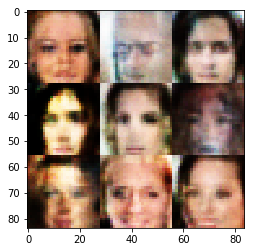

Epoch 1/1... Discriminator Loss: 0.3738... Generator Loss: 3.6973
Epoch 1/1... Discriminator Loss: 0.4290... Generator Loss: 2.6381
Epoch 1/1... Discriminator Loss: 0.4376... Generator Loss: 2.9097
Epoch 1/1... Discriminator Loss: 2.4846... Generator Loss: 0.1799
Epoch 1/1... Discriminator Loss: 1.0527... Generator Loss: 0.8531
Epoch 1/1... Discriminator Loss: 1.8407... Generator Loss: 0.3424
Epoch 1/1... Discriminator Loss: 0.8404... Generator Loss: 1.0332
Epoch 1/1... Discriminator Loss: 0.7325... Generator Loss: 1.3072
Epoch 1/1... Discriminator Loss: 0.3881... Generator Loss: 3.7745
Epoch 1/1... Discriminator Loss: 0.3615... Generator Loss: 4.6303


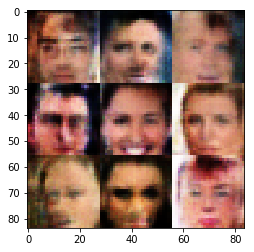

Epoch 1/1... Discriminator Loss: 0.4491... Generator Loss: 2.5550
Epoch 1/1... Discriminator Loss: 0.3877... Generator Loss: 3.4379
Epoch 1/1... Discriminator Loss: 0.4449... Generator Loss: 4.4680
Epoch 1/1... Discriminator Loss: 0.4809... Generator Loss: 3.5814
Epoch 1/1... Discriminator Loss: 0.3572... Generator Loss: 4.2250
Epoch 1/1... Discriminator Loss: 0.3562... Generator Loss: 4.1502
Epoch 1/1... Discriminator Loss: 0.6983... Generator Loss: 6.6161
Epoch 1/1... Discriminator Loss: 0.6209... Generator Loss: 1.5336
Epoch 1/1... Discriminator Loss: 0.5439... Generator Loss: 4.4893
Epoch 1/1... Discriminator Loss: 0.4000... Generator Loss: 4.6474


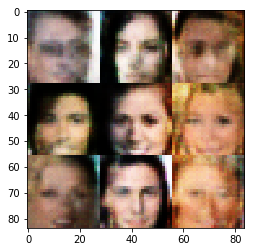

Epoch 1/1... Discriminator Loss: 0.3762... Generator Loss: 6.0326
Epoch 1/1... Discriminator Loss: 0.3540... Generator Loss: 6.5915
Epoch 1/1... Discriminator Loss: 0.4234... Generator Loss: 4.7511
Epoch 1/1... Discriminator Loss: 0.6949... Generator Loss: 6.7356
Epoch 1/1... Discriminator Loss: 0.3708... Generator Loss: 4.8550
Epoch 1/1... Discriminator Loss: 0.3662... Generator Loss: 3.8428
Epoch 1/1... Discriminator Loss: 0.3490... Generator Loss: 5.6683
Epoch 1/1... Discriminator Loss: 0.6469... Generator Loss: 1.6004
Epoch 1/1... Discriminator Loss: 0.6308... Generator Loss: 1.5106
Epoch 1/1... Discriminator Loss: 0.8152... Generator Loss: 1.0620


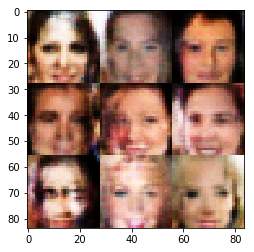

Epoch 1/1... Discriminator Loss: 0.6675... Generator Loss: 3.1145
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 3.0583
Epoch 1/1... Discriminator Loss: 0.4574... Generator Loss: 2.3899
Epoch 1/1... Discriminator Loss: 0.3615... Generator Loss: 4.7266
Epoch 1/1... Discriminator Loss: 0.4462... Generator Loss: 4.7591
Epoch 1/1... Discriminator Loss: 1.0654... Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 0.4817... Generator Loss: 2.3057
Epoch 1/1... Discriminator Loss: 0.6767... Generator Loss: 3.5771
Epoch 1/1... Discriminator Loss: 0.3858... Generator Loss: 3.5227
Epoch 1/1... Discriminator Loss: 0.8143... Generator Loss: 3.1024


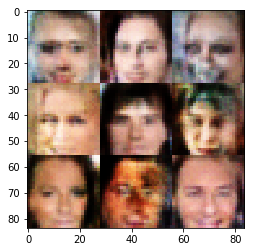

Epoch 1/1... Discriminator Loss: 0.4566... Generator Loss: 2.3113
Epoch 1/1... Discriminator Loss: 0.8471... Generator Loss: 1.0545
Epoch 1/1... Discriminator Loss: 0.4431... Generator Loss: 2.4799
Epoch 1/1... Discriminator Loss: 0.4096... Generator Loss: 2.8704
Epoch 1/1... Discriminator Loss: 0.4134... Generator Loss: 2.7119
Epoch 1/1... Discriminator Loss: 0.4498... Generator Loss: 5.8419
Epoch 1/1... Discriminator Loss: 0.3460... Generator Loss: 4.6752
Epoch 1/1... Discriminator Loss: 0.3718... Generator Loss: 3.6476
Epoch 1/1... Discriminator Loss: 0.8196... Generator Loss: 6.1759
Epoch 1/1... Discriminator Loss: 1.0157... Generator Loss: 1.1848


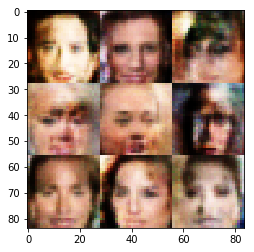

Epoch 1/1... Discriminator Loss: 0.7428... Generator Loss: 1.1895
Epoch 1/1... Discriminator Loss: 0.4759... Generator Loss: 2.1343
Epoch 1/1... Discriminator Loss: 0.5009... Generator Loss: 4.7309
Epoch 1/1... Discriminator Loss: 0.6120... Generator Loss: 1.6174
Epoch 1/1... Discriminator Loss: 0.4807... Generator Loss: 4.1714
Epoch 1/1... Discriminator Loss: 0.8417... Generator Loss: 1.5764
Epoch 1/1... Discriminator Loss: 0.9761... Generator Loss: 0.9135
Epoch 1/1... Discriminator Loss: 0.5343... Generator Loss: 6.4043
Epoch 1/1... Discriminator Loss: 0.4495... Generator Loss: 4.4879
Epoch 1/1... Discriminator Loss: 0.4880... Generator Loss: 4.8272


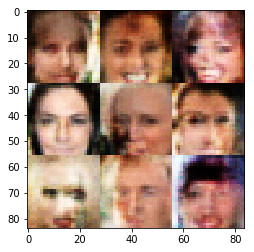

Epoch 1/1... Discriminator Loss: 0.6206... Generator Loss: 1.5640
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.5378
Epoch 1/1... Discriminator Loss: 0.3816... Generator Loss: 3.5689
Epoch 1/1... Discriminator Loss: 0.4965... Generator Loss: 4.0025
Epoch 1/1... Discriminator Loss: 0.4615... Generator Loss: 3.4324
Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 1.0657
Epoch 1/1... Discriminator Loss: 1.6345... Generator Loss: 0.3714
Epoch 1/1... Discriminator Loss: 0.6684... Generator Loss: 4.5504
Epoch 1/1... Discriminator Loss: 0.3767... Generator Loss: 3.7715
Epoch 1/1... Discriminator Loss: 1.2641... Generator Loss: 0.5772


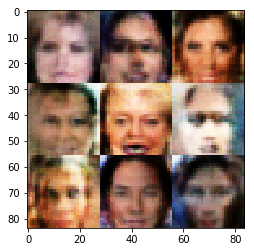

Epoch 1/1... Discriminator Loss: 0.3607... Generator Loss: 3.9659
Epoch 1/1... Discriminator Loss: 0.3640... Generator Loss: 5.0120
Epoch 1/1... Discriminator Loss: 1.1835... Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 0.9121... Generator Loss: 6.7155
Epoch 1/1... Discriminator Loss: 1.5096... Generator Loss: 0.4596
Epoch 1/1... Discriminator Loss: 0.3560... Generator Loss: 5.2752
Epoch 1/1... Discriminator Loss: 0.8972... Generator Loss: 6.3973
Epoch 1/1... Discriminator Loss: 0.4205... Generator Loss: 4.5793
Epoch 1/1... Discriminator Loss: 0.3856... Generator Loss: 5.7727
Epoch 1/1... Discriminator Loss: 0.4091... Generator Loss: 2.8426


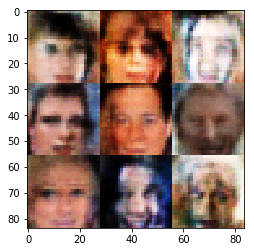

Epoch 1/1... Discriminator Loss: 0.7471... Generator Loss: 1.2634
Epoch 1/1... Discriminator Loss: 0.3586... Generator Loss: 4.9938
Epoch 1/1... Discriminator Loss: 0.3827... Generator Loss: 3.4292
Epoch 1/1... Discriminator Loss: 0.4558... Generator Loss: 2.4704
Epoch 1/1... Discriminator Loss: 0.4742... Generator Loss: 2.1979
Epoch 1/1... Discriminator Loss: 2.3481... Generator Loss: 0.2088
Epoch 1/1... Discriminator Loss: 0.3534... Generator Loss: 5.2081
Epoch 1/1... Discriminator Loss: 0.5154... Generator Loss: 2.0040
Epoch 1/1... Discriminator Loss: 0.3773... Generator Loss: 3.5764
Epoch 1/1... Discriminator Loss: 1.0175... Generator Loss: 0.8446


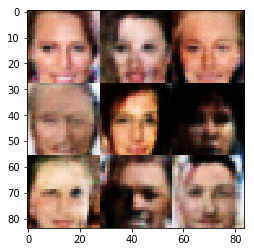

Epoch 1/1... Discriminator Loss: 0.4949... Generator Loss: 2.3297
Epoch 1/1... Discriminator Loss: 0.3722... Generator Loss: 3.7506
Epoch 1/1... Discriminator Loss: 0.3688... Generator Loss: 3.5535
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.1751... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.0610... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 0.4778... Generator Loss: 3.2148
Epoch 1/1... Discriminator Loss: 0.4836... Generator Loss: 6.6406
Epoch 1/1... Discriminator Loss: 0.3757... Generator Loss: 3.5710
Epoch 1/1... Discriminator Loss: 1.4821... Generator Loss: 0.4362


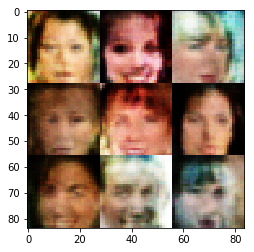

Epoch 1/1... Discriminator Loss: 0.3513... Generator Loss: 5.7760
Epoch 1/1... Discriminator Loss: 0.3871... Generator Loss: 4.0970
Epoch 1/1... Discriminator Loss: 1.6207... Generator Loss: 0.4745
Epoch 1/1... Discriminator Loss: 0.3971... Generator Loss: 3.0729
Epoch 1/1... Discriminator Loss: 1.7014... Generator Loss: 0.3623
Epoch 1/1... Discriminator Loss: 0.4590... Generator Loss: 2.4833
Epoch 1/1... Discriminator Loss: 0.6834... Generator Loss: 1.5024
Epoch 1/1... Discriminator Loss: 0.5680... Generator Loss: 2.3567
Epoch 1/1... Discriminator Loss: 0.9524... Generator Loss: 0.9202
Epoch 1/1... Discriminator Loss: 0.3652... Generator Loss: 6.3304


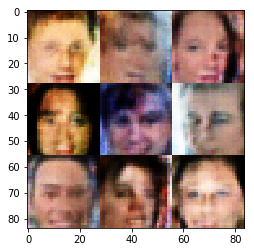

Epoch 1/1... Discriminator Loss: 0.3864... Generator Loss: 3.2490
Epoch 1/1... Discriminator Loss: 0.8041... Generator Loss: 1.1122
Epoch 1/1... Discriminator Loss: 0.6585... Generator Loss: 1.4401
Epoch 1/1... Discriminator Loss: 0.3508... Generator Loss: 5.5859
Epoch 1/1... Discriminator Loss: 0.7359... Generator Loss: 1.2020
Epoch 1/1... Discriminator Loss: 1.5736... Generator Loss: 0.3754
Epoch 1/1... Discriminator Loss: 0.5437... Generator Loss: 1.8439
Epoch 1/1... Discriminator Loss: 0.8621... Generator Loss: 0.9868
Epoch 1/1... Discriminator Loss: 0.5802... Generator Loss: 1.7074
Epoch 1/1... Discriminator Loss: 0.9241... Generator Loss: 0.9095


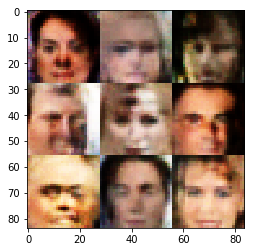

Epoch 1/1... Discriminator Loss: 0.7419... Generator Loss: 1.4200
Epoch 1/1... Discriminator Loss: 0.7231... Generator Loss: 1.3148
Epoch 1/1... Discriminator Loss: 0.6682... Generator Loss: 1.7492
Epoch 1/1... Discriminator Loss: 0.3688... Generator Loss: 3.8280
Epoch 1/1... Discriminator Loss: 0.5463... Generator Loss: 5.8594
Epoch 1/1... Discriminator Loss: 0.3654... Generator Loss: 3.9949
Epoch 1/1... Discriminator Loss: 0.4219... Generator Loss: 5.9739
Epoch 1/1... Discriminator Loss: 0.3546... Generator Loss: 5.2928
Epoch 1/1... Discriminator Loss: 0.3406... Generator Loss: 6.0205
Epoch 1/1... Discriminator Loss: 0.4050... Generator Loss: 3.0454


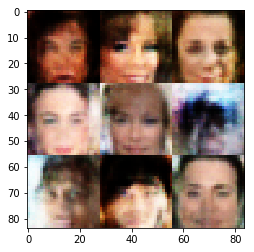

Epoch 1/1... Discriminator Loss: 0.9856... Generator Loss: 6.8051
Epoch 1/1... Discriminator Loss: 0.4430... Generator Loss: 3.0017
Epoch 1/1... Discriminator Loss: 0.6802... Generator Loss: 7.8031
Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 0.6569
Epoch 1/1... Discriminator Loss: 1.5956... Generator Loss: 0.4305
Epoch 1/1... Discriminator Loss: 0.4138... Generator Loss: 3.7938
Epoch 1/1... Discriminator Loss: 0.4561... Generator Loss: 2.2534
Epoch 1/1... Discriminator Loss: 0.4651... Generator Loss: 2.4762
Epoch 1/1... Discriminator Loss: 0.5267... Generator Loss: 1.8725
Epoch 1/1... Discriminator Loss: 0.3726... Generator Loss: 4.3777


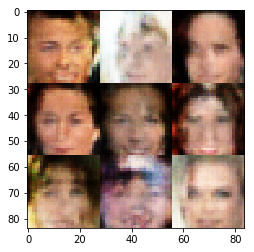

Epoch 1/1... Discriminator Loss: 0.3973... Generator Loss: 5.2393
Epoch 1/1... Discriminator Loss: 0.4396... Generator Loss: 2.4578
Epoch 1/1... Discriminator Loss: 0.5841... Generator Loss: 1.5742
Epoch 1/1... Discriminator Loss: 0.9972... Generator Loss: 0.7954
Epoch 1/1... Discriminator Loss: 0.3671... Generator Loss: 3.8464
Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 3.2367
Epoch 1/1... Discriminator Loss: 0.8559... Generator Loss: 1.0323
Epoch 1/1... Discriminator Loss: 1.1499... Generator Loss: 8.7487
Epoch 1/1... Discriminator Loss: 0.7843... Generator Loss: 1.1639
Epoch 1/1... Discriminator Loss: 0.4061... Generator Loss: 5.2705


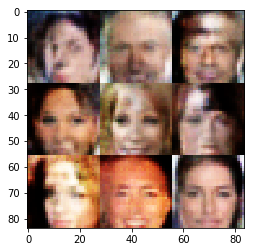

Epoch 1/1... Discriminator Loss: 0.4247... Generator Loss: 2.7631
Epoch 1/1... Discriminator Loss: 0.3644... Generator Loss: 4.0339
Epoch 1/1... Discriminator Loss: 0.6649... Generator Loss: 1.4724
Epoch 1/1... Discriminator Loss: 0.9501... Generator Loss: 0.8932
Epoch 1/1... Discriminator Loss: 0.6198... Generator Loss: 1.5340
Epoch 1/1... Discriminator Loss: 0.7169... Generator Loss: 9.4304
Epoch 1/1... Discriminator Loss: 0.3494... Generator Loss: 4.6153
Epoch 1/1... Discriminator Loss: 0.3995... Generator Loss: 3.0905
Epoch 1/1... Discriminator Loss: 0.4678... Generator Loss: 6.8462
Epoch 1/1... Discriminator Loss: 0.6257... Generator Loss: 4.5102


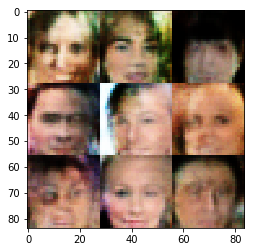

Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 1.0998
Epoch 1/1... Discriminator Loss: 0.4746... Generator Loss: 2.1566
Epoch 1/1... Discriminator Loss: 0.3375... Generator Loss: 6.6910
Epoch 1/1... Discriminator Loss: 0.6388... Generator Loss: 1.5388
Epoch 1/1... Discriminator Loss: 1.4625... Generator Loss: 0.4645
Epoch 1/1... Discriminator Loss: 0.9651... Generator Loss: 0.9138
Epoch 1/1... Discriminator Loss: 0.4034... Generator Loss: 4.0352
Epoch 1/1... Discriminator Loss: 0.3859... Generator Loss: 3.2297
Epoch 1/1... Discriminator Loss: 2.2179... Generator Loss: 0.2110
Epoch 1/1... Discriminator Loss: 2.1516... Generator Loss: 0.2566


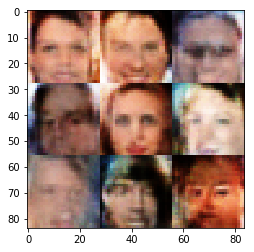

Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 0.3792... Generator Loss: 3.5783
Epoch 1/1... Discriminator Loss: 0.3985... Generator Loss: 3.4408
Epoch 1/1... Discriminator Loss: 0.6261... Generator Loss: 1.8220
Epoch 1/1... Discriminator Loss: 0.4740... Generator Loss: 5.6587
Epoch 1/1... Discriminator Loss: 0.5879... Generator Loss: 1.7068
Epoch 1/1... Discriminator Loss: 0.3545... Generator Loss: 4.9082
Epoch 1/1... Discriminator Loss: 0.5019... Generator Loss: 2.1529
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 4.1450
Epoch 1/1... Discriminator Loss: 0.3737... Generator Loss: 5.6567


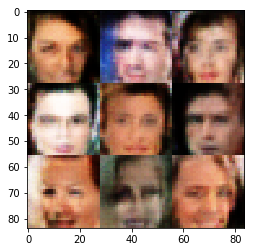

Epoch 1/1... Discriminator Loss: 0.3982... Generator Loss: 3.1871
Epoch 1/1... Discriminator Loss: 0.3568... Generator Loss: 4.4061
Epoch 1/1... Discriminator Loss: 0.3502... Generator Loss: 6.3287
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.7018
Epoch 1/1... Discriminator Loss: 0.3669... Generator Loss: 5.9760
Epoch 1/1... Discriminator Loss: 0.9840... Generator Loss: 0.8887
Epoch 1/1... Discriminator Loss: 0.7669... Generator Loss: 1.2112
Epoch 1/1... Discriminator Loss: 0.3412... Generator Loss: 5.8964
Epoch 1/1... Discriminator Loss: 2.0419... Generator Loss: 4.8227
Epoch 1/1... Discriminator Loss: 1.3426... Generator Loss: 0.5565


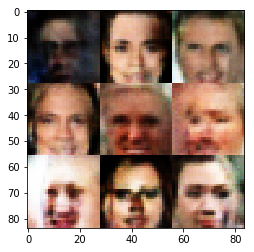

Epoch 1/1... Discriminator Loss: 0.6022... Generator Loss: 1.9665
Epoch 1/1... Discriminator Loss: 0.5355... Generator Loss: 2.3180
Epoch 1/1... Discriminator Loss: 0.3452... Generator Loss: 4.8448
Epoch 1/1... Discriminator Loss: 0.3955... Generator Loss: 4.8754
Epoch 1/1... Discriminator Loss: 0.5838... Generator Loss: 1.7221
Epoch 1/1... Discriminator Loss: 0.6622... Generator Loss: 2.5163


KeyboardInterrupt: 

In [12]:
batch_size = 32
z_dim = 100
learning_rate = .0001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.